In [10]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import imblearn
from imblearn import over_sampling

# pre-processing
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 

# install: conda install -c conda-forge category_encoders
import category_encoders
from category_encoders import TargetEncoder

import datetime
import statsmodels.api as sm

In [11]:
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Seaborn:', sns.__version__)
print('Imblearn:', imblearn.__version__)
print('Scikit-Learn:', sklearn.__version__)
print('Category Encoders:', category_encoders.__version__)
print('Statsmodels:', sm.__version__)

Pandas: 1.0.5
Numpy: 1.18.5
Matplotlib: 3.2.2
Seaborn: 0.10.1
Imblearn: 0.7.0
Scikit-Learn: 0.23.1
Category Encoders: 2.2.2
Statsmodels: 0.11.1


In [12]:
sns.set_style("whitegrid")
sns.color_palette("bright")
plt.style.use("fivethirtyeight")

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/health-insurance-cross-sell-prediction/train.csv')
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/health-insurance-cross-sell-prediction/train.csv')
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [22]:
print(data.select_dtypes(include = np.number).shape)
data.select_dtypes(include = np.number)

(381109, 9)


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0
381105,381106,30,1,37.0,1,40016.0,152.0,131,0
381106,381107,21,1,30.0,1,35118.0,160.0,161,0
381107,381108,68,1,14.0,0,44617.0,124.0,74,0


In [23]:
print(data.select_dtypes(include = object).shape)
data.select_dtypes(include = object)

(381109, 3)


,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [24]:
features_num = list(data.select_dtypes(include = np.number).drop(columns = ['id', 'Response'], axis = 1).columns)
print('Lenghth: ', len(features_num))
features_num

Lenghth:  7


['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [25]:
features_cat = list(data.select_dtypes(include = object).columns)
print('Lenghth: ', len(features_cat))
features_cat

Lenghth:  3


['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [26]:
features_list = features_num + features_cat
print('Lenghth: ', len(features_list))
features_list

Lenghth:  10


['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Gender',
 'Vehicle_Age',
 'Vehicle_Damage']

In [27]:
print('Unique Values:', data['Response'].nunique(), '\nType:', data['Response'].dtypes)
data.groupby(['Response']).count()[['id']]

Unique Values: 2 
Type: int64


,id
Response,
0,334399
1,46710


In [28]:
print('Row counts:', data.shape[0], '\nColumn counts:', data.shape[1], '\n')
data.head()

Row counts: 381109 
Column counts: 12 



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [30]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [31]:
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [32]:
print('Unique Values:', data['Driving_License'].nunique(), '\nType:', data['Driving_License'].dtypes)
data.groupby(['Driving_License']).count()[['id']]

Unique Values: 2 
Type: int64


,id
Driving_License,
0,812
1,380297


In [33]:
print('Unique Values:', data['Previously_Insured'].nunique(), '\nType:', data['Previously_Insured'].dtypes)
data.groupby(['Previously_Insured']).count()[['id']]

Unique Values: 2 
Type: int64


,id
Previously_Insured,
0,206481
1,174628


In [34]:
print('Unique Values:', data['Vehicle_Age'].nunique(), '\nType:', data['Vehicle_Age'].dtypes)
data.groupby(['Vehicle_Age']).count()[['id']]

Unique Values: 3 
Type: object


,id
Vehicle_Age,
1-2 Year,200316
< 1 Year,164786
> 2 Years,16007


In [35]:
print('Any duplicated rows?')
print('No') if data.duplicated().values.any() == False else print('Yes')

Any duplicated rows?
No


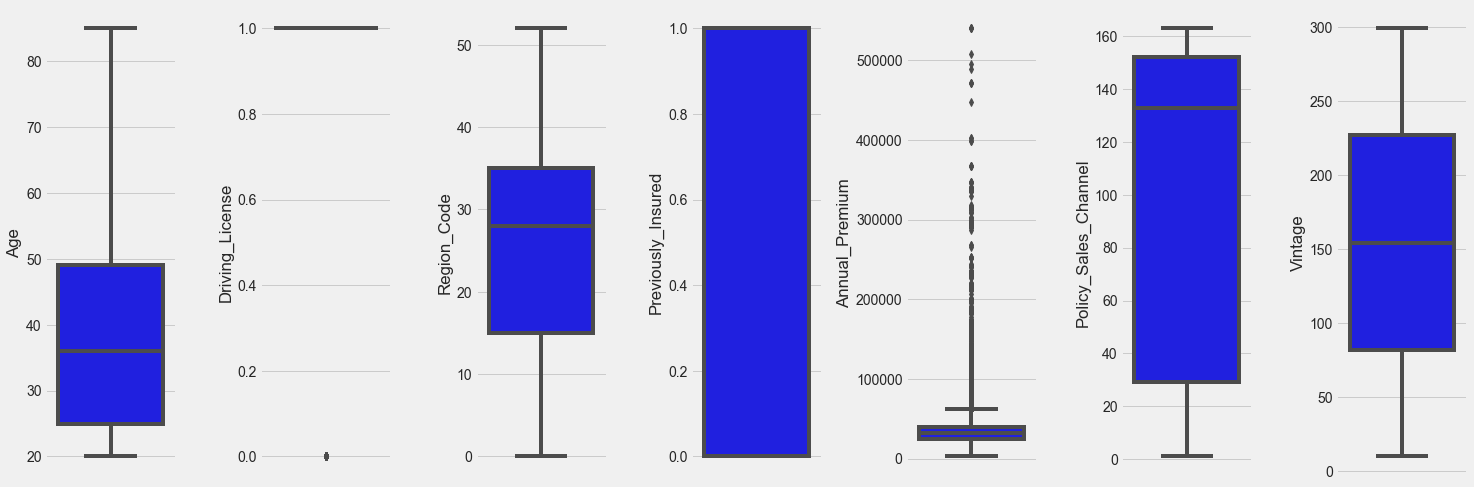

In [36]:
plt.figure(figsize = (20.7, 7))
for i in range(0, len(features_num)):
    plt.subplot(1, 7, i + 1)
    sns.boxplot(
        y = data[features_num[i]],
        color = 'blue'
    )

plt.tight_layout()

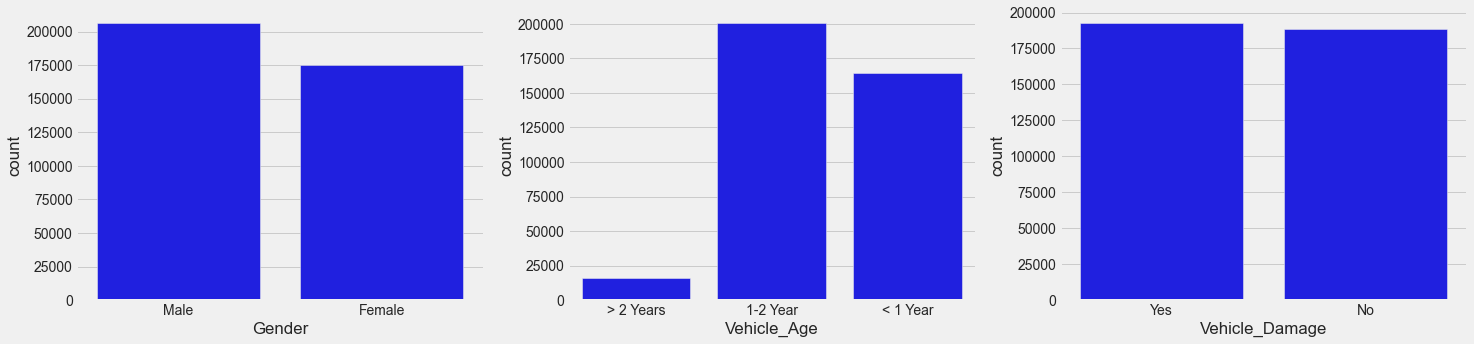

In [37]:
plt.figure(figsize = (20.7, 5))

for i in range(0, len(features_cat)):
    plt.subplot(1, 3, i + 1)
    sns.countplot(
        x = data[features_cat[i]],
        color = 'blue'
    )

plt.tight_layout()

In [38]:
data_preprocess = data.copy()
data_preprocess

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [39]:
data_preprocess['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [40]:
dummies_Gender = pd.get_dummies(data_preprocess['Gender'], prefix = 'Gender')
data_preprocess = pd.concat([data_preprocess, dummies_Gender], axis = 1)
data_preprocess[['Gender', 'Gender_Male', 'Gender_Female']].head()

,Gender,Gender_Male,Gender_Female
0,Male,1,0
1,Male,1,0
2,Male,1,0
3,Male,1,0
4,Female,0,1


In [41]:
data_preprocess['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [42]:
data_preprocess['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [43]:
te = TargetEncoder()
data_preprocess['Region_Code_Encoding'] = te.fit_transform(data_preprocess['Region_Code'].astype(str), data_preprocess['Response'])

In [44]:
data_preprocess[['Region_Code', 'Response', 'Region_Code_Encoding']].head()

,Region_Code,Response,Region_Code_Encoding
0,28.0,1,0.187163
1,3.0,0,0.127662
2,28.0,1,0.187163
3,11.0,0,0.112760
4,41.0,0,0.121776


In [45]:
sort_region = data_preprocess.sort_values(['Region_Code', 'Region_Code_Encoding'], ascending = True)
sort_region

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Region_Code_Encoding
181,182,Male,52,1,0.0,0,1-2 Year,Yes,2630.0,124.0,89,0,0,1,0.086096
185,186,Male,52,1,0.0,1,1-2 Year,No,2630.0,26.0,134,0,0,1,0.086096
232,233,Male,53,1,0.0,0,1-2 Year,Yes,2630.0,26.0,69,0,0,1,0.086096
710,711,Female,46,1,0.0,0,1-2 Year,Yes,2630.0,47.0,292,0,1,0,0.086096
1500,1501,Male,38,1,0.0,1,1-2 Year,No,2630.0,26.0,107,0,0,1,0.086096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377620,377621,Female,36,1,52.0,0,1-2 Year,Yes,2630.0,156.0,287,0,1,0,0.123596
379190,379191,Female,52,1,52.0,0,1-2 Year,No,38666.0,124.0,76,0,1,0,0.123596
379972,379973,Male,52,1,52.0,0,1-2 Year,Yes,74788.0,26.0,231,0,0,1,0.123596
380255,380256,Male,65,1,52.0,0,> 2 Years,Yes,37150.0,163.0,93,1,0,1,0.123596


In [46]:
region_unique = sort_region.groupby('Region_Code').first().reset_index()[['Region_Code', 'Region_Code_Encoding']]
region_unique

,Region_Code,Region_Code_Encoding
0,0.0,0.086096
1,1.0,0.108135
2,2.0,0.071075
3,3.0,0.127662
4,4.0,0.158245
5,5.0,0.115715
6,6.0,0.069904
7,7.0,0.131747
8,8.0,0.096142
9,9.0,0.081587


In [47]:
data_preprocess['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [48]:
data_preprocess['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [49]:
oe_va = OrdinalEncoder(categories = [['< 1 Year', '1-2 Year', '> 2 Years']], dtype = np.int64)
data_preprocess['Vehicle_Age_Encoding'] = oe_va.fit_transform(data_preprocess.loc[:, ['Vehicle_Age']])

In [50]:
data_preprocess['Vehicle_Age_Encoding'].value_counts()

1    200316
0    164786
2     16007
Name: Vehicle_Age_Encoding, dtype: int64

In [51]:
data_preprocess['Vehicle_Age_Encoding'].skew()

0.2528959057940246

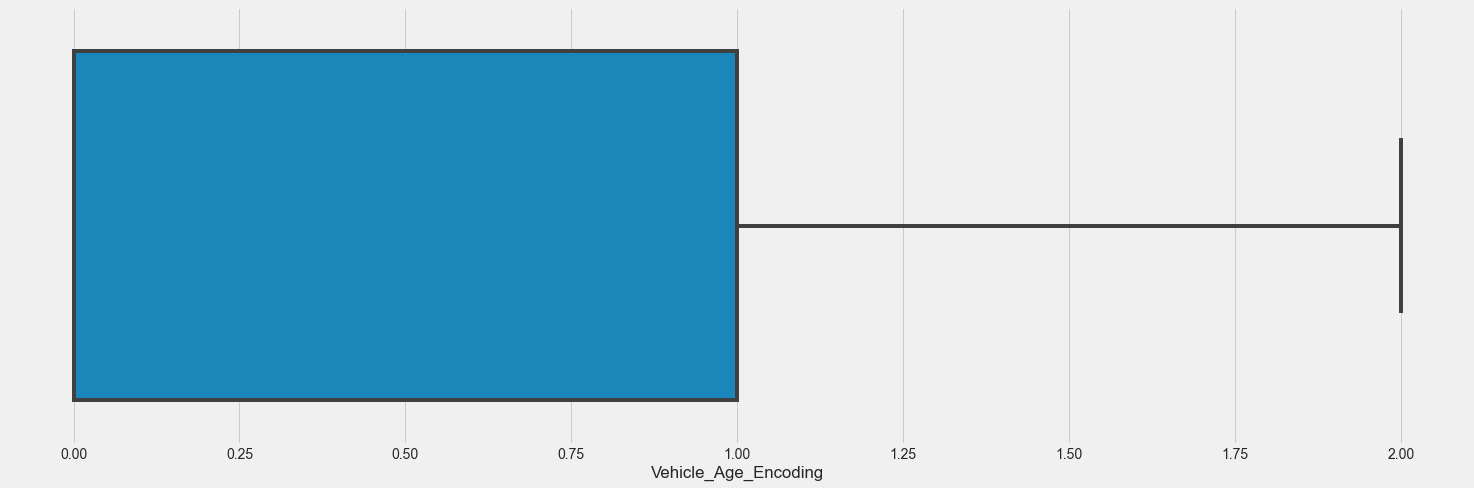

In [52]:
plt.figure(figsize = (20.7, 7))

sns.boxplot(
    x = data_preprocess['Vehicle_Age_Encoding']
)

plt.tight_layout()

In [54]:
data_preprocess['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [55]:
le = LabelEncoder()
data_preprocess['Vehicle_Damage_Encoding'] = le.fit_transform(data_preprocess['Vehicle_Damage'])
data_preprocess['Vehicle_Damage_Encoding'].value_counts()

1    192413
0    188696
Name: Vehicle_Damage_Encoding, dtype: int64

In [64]:
data_preprocess['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [66]:
te = TargetEncoder()
data_preprocess['Policy_Sales_Channel_Encoding'] = te.fit_transform(data_preprocess['Policy_Sales_Channel'].astype(str), data_preprocess['Response'])

In [67]:
data_preprocess[['Policy_Sales_Channel', 'Response', 'Policy_Sales_Channel_Encoding']].head()

,Policy_Sales_Channel,Response,Policy_Sales_Channel_Encoding
0,26.0,1,0.199385
1,26.0,0,0.199385
2,26.0,1,0.199385
3,152.0,0,0.028624
4,152.0,0,0.028624


In [69]:
data_preprocess['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

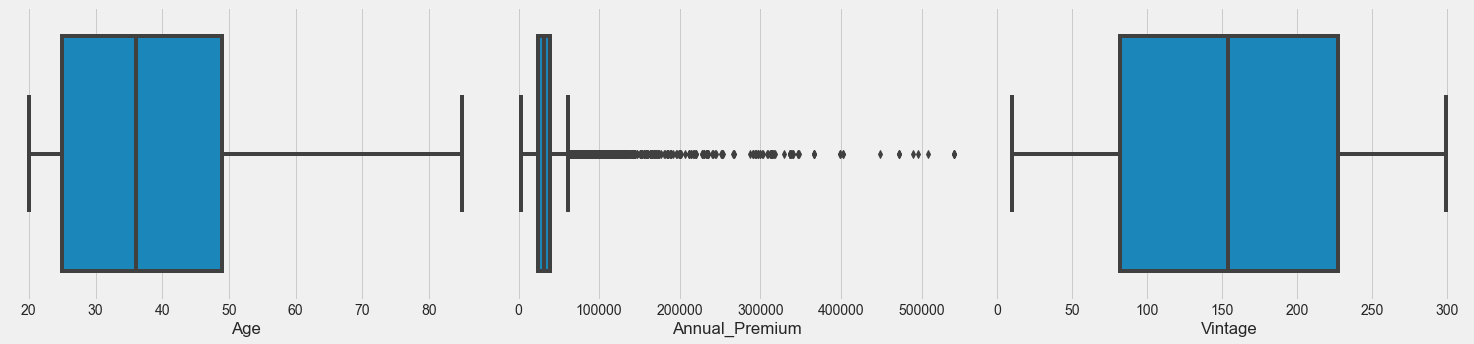

In [70]:
list_2 = ['Age', 'Annual_Premium', 'Vintage']

plt.figure(figsize = (20.7, 5))

for i in range(0, len(list_2)):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        x = data_preprocess[list_2[i]],
        hue = data_preprocess['Response']
    )

plt.tight_layout()

In [71]:
data_preprocess[['Age', 'Annual_Premium', 'Vintage']].skew()

Age               0.672539
Annual_Premium    1.766087
Vintage           0.003030
dtype: float64

In [72]:
data_preprocess[['Region_Code_Encoding', 'Policy_Sales_Channel_Encoding']].skew()

Region_Code_Encoding             0.398865
Policy_Sales_Channel_Encoding   -0.010833
dtype: float64

In [73]:
data_preprocess['Age_log'] = np.log(data_preprocess['Age'])
data_preprocess[['Age', 'Age_log']].describe()

,Age,Age_log
count,381109.000000,381109.000000
mean,38.822584,3.581808
std,15.511611,0.390917
min,20.000000,2.995732
25%,25.000000,3.218876
50%,36.000000,3.583519
75%,49.000000,3.891820
max,85.000000,4.442651


In [137]:
data_preprocess[['Age', 'Age_log']].skew()

Age        0.672539
Age_log    0.204487
dtype: float64

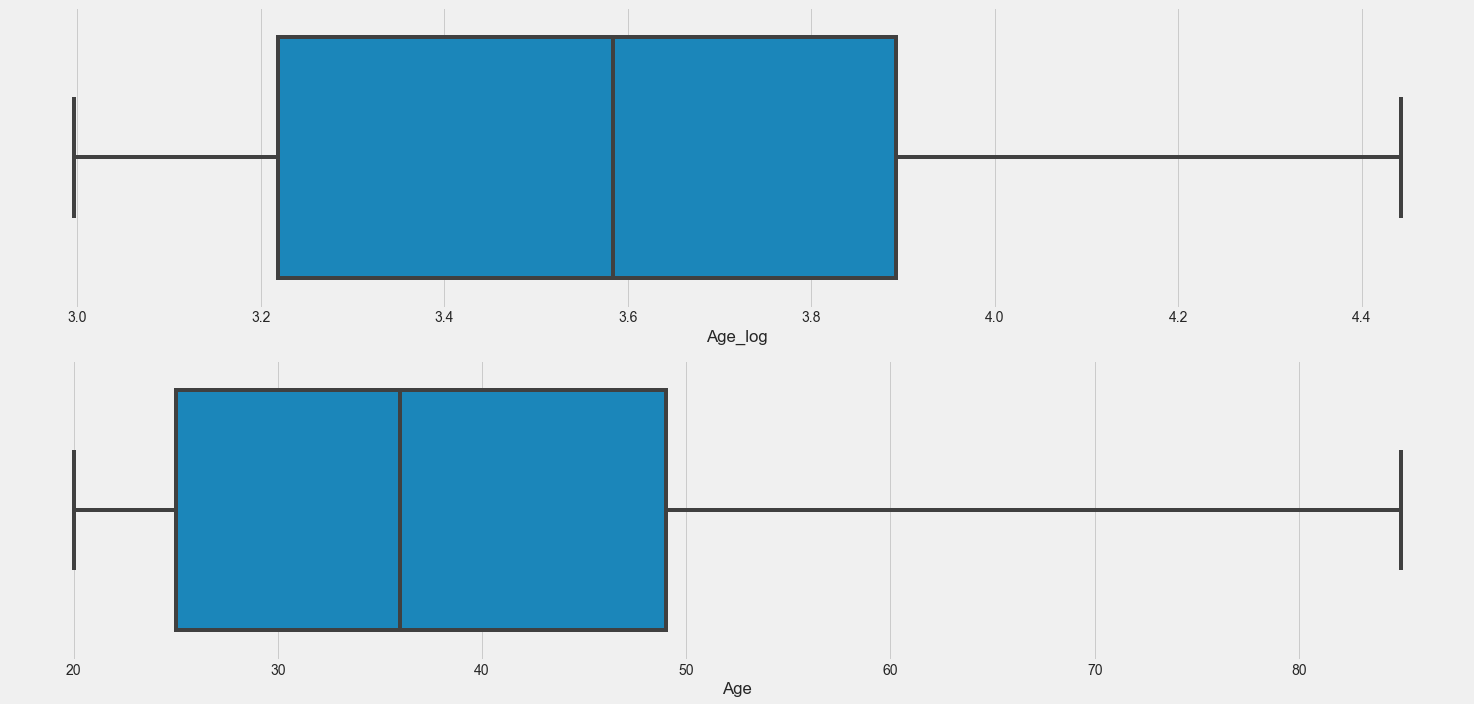

In [143]:
plt.figure(figsize = (20.7, 10))

plt.subplot(2, 1, 1)
sns.boxplot(
    x = data_preprocess['Age_log']
)

plt.subplot(2, 1, 2)
sns.boxplot(
    x = data_preprocess['Age']
)

plt.tight_layout()

In [144]:
Q1 = data_preprocess['Age_log'].quantile(0.25)
Q3 = data_preprocess['Age_log'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

print(low_limit)
print(high_limit)

2.2094591150045617
4.901237007974265


In [145]:
filtered_entries = ((data_preprocess['Age_log'] < low_limit) | (data_preprocess['Age_log'] > high_limit))
data_preprocess[filtered_entries].shape

(0, 19)

In [146]:
data_preprocess[['Annual_Premium']].skew()

Annual_Premium    1.766087
dtype: float64

In [147]:
before_remove = data_preprocess.shape[0]
before_remove 

381109

In [148]:
Q1 = data_preprocess['Annual_Premium'].quantile(0.25)
Q3 = data_preprocess['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

print(low_limit)
print(high_limit)

1912.5
61892.5


In [149]:
filtered_entries = ((data_preprocess['Annual_Premium'] >= low_limit) & (data_preprocess['Annual_Premium'] <= high_limit))
data_preprocess = data_preprocess[filtered_entries].reset_index(drop = True)

In [150]:
after_remove = data_preprocess.shape[0]
after_remove

370789

In [151]:
print('Outlier removed:', round(100 - (after_remove * 100 / before_remove), 2), '%')

Outlier removed: 2.71 %


In [152]:
data_preprocess[['Annual_Premium']].skew()

Annual_Premium   -0.519684
dtype: float64

In [153]:
data_preprocess['Annual_Premium_log'] = np.log(data_preprocess['Annual_Premium'])
data_preprocess[['Annual_Premium', 'Annual_Premium_log']].describe()

,Annual_Premium,Annual_Premium_log
count,370789.000000,370789.000000
mean,29264.643973,9.981145
std,14743.056656,0.997650
min,2630.000000,7.874739
25%,24102.000000,10.090050
50%,31319.000000,10.351980
75%,38596.000000,10.560904
max,61892.000000,11.033146


In [154]:
data_preprocess[['Annual_Premium', 'Annual_Premium_log']].skew()

Annual_Premium       -0.519684
Annual_Premium_log   -1.500105
dtype: float64

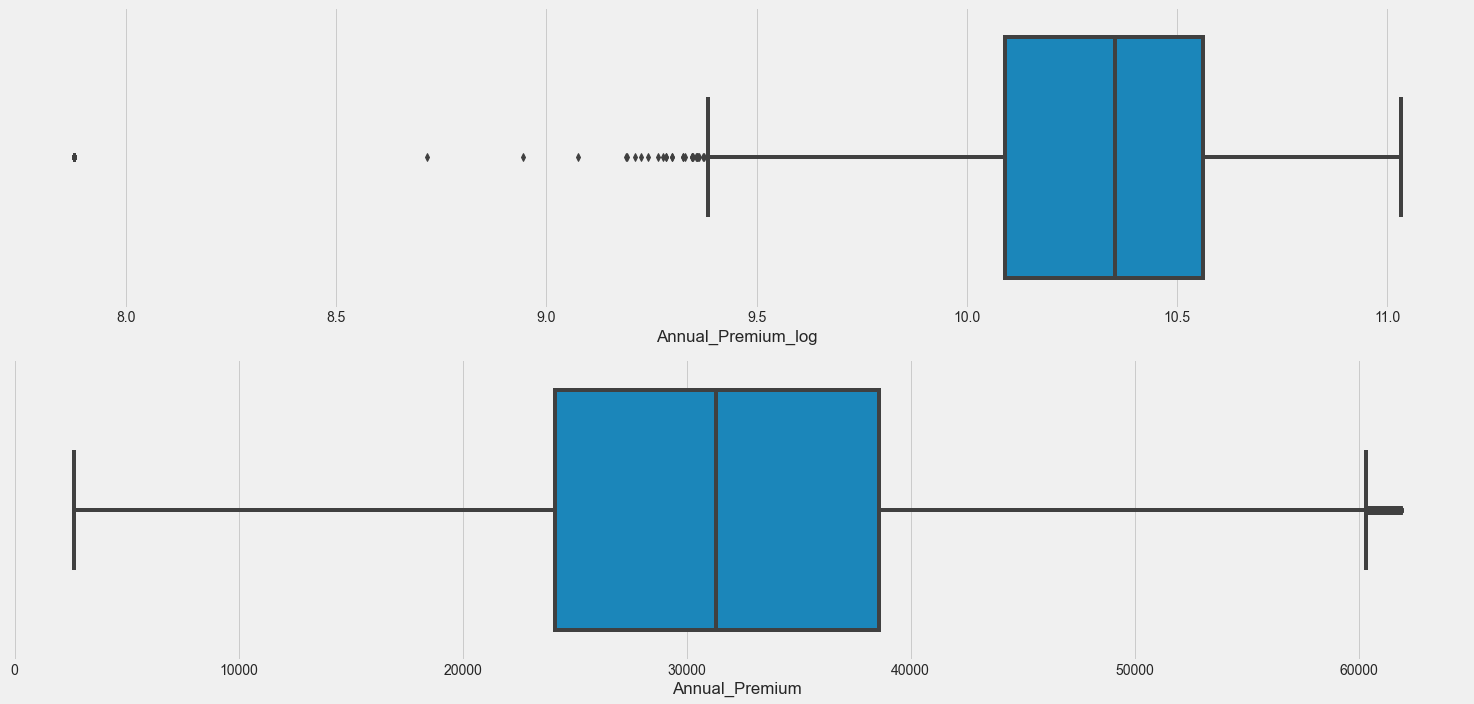

In [163]:
plt.figure(figsize = (20.7, 10))

plt.subplot(2, 1, 1)
sns.boxplot(
    x = data_preprocess['Annual_Premium_log']
)

plt.subplot(2, 1, 2)
sns.boxplot(
    x = data_preprocess['Annual_Premium']
)

plt.tight_layout()

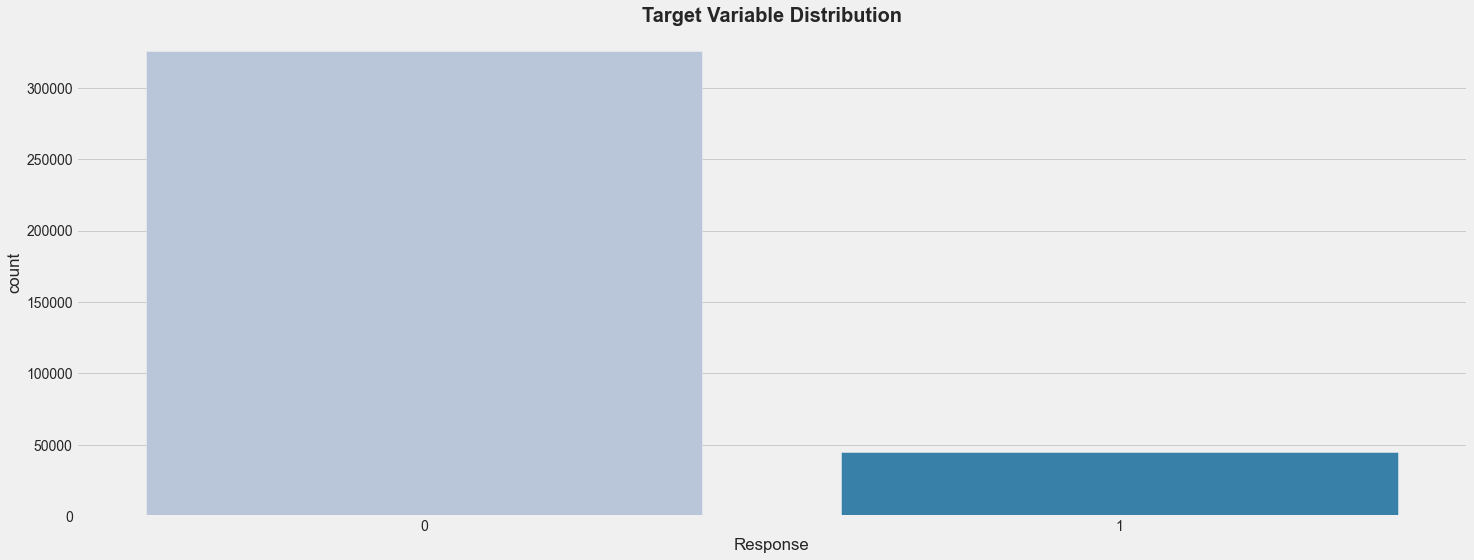

In [164]:
plt.figure(figsize = (20.7, 8))

sns.countplot(
    x = data_preprocess['Response'],
    palette = 'PuBu'
)

plt.title('Target Variable Distribution', fontsize = 20, fontweight = 'bold')

plt.tight_layout()

In [165]:
data_preprocess['Response'].value_counts()

0    325634
1     45155
Name: Response, dtype: int64

In [166]:
data_preprocess_oversampling = data_preprocess[[
    'Gender_Male', 'Gender_Female',
    'Age_log',
    'Driving_License',
    'Region_Code_Encoding',
    'Previously_Insured',
    'Vehicle_Age_Encoding',
    'Vehicle_Damage_Encoding',
    'Annual_Premium',
    'Policy_Sales_Channel_Encoding',
    'Vintage',
    'Response'
]]
data_preprocess_oversampling

,Gender_Male,Gender_Female,Age_log,Driving_License,Region_Code_Encoding,Previously_Insured,Vehicle_Age_Encoding,Vehicle_Damage_Encoding,Annual_Premium,Policy_Sales_Channel_Encoding,Vintage,Response
0,1,0,3.784190,1,0.187163,0,2,1,40454.0,0.199385,217,1
1,1,0,4.330733,1,0.127662,0,1,0,33536.0,0.199385,183,0
2,1,0,3.850148,1,0.187163,0,2,1,38294.0,0.199385,27,1
3,1,0,3.044522,1,0.112760,1,0,0,28619.0,0.028624,203,0
4,0,1,3.367296,1,0.121776,1,0,0,27496.0,0.028624,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
370784,1,0,4.304065,1,0.072284,1,1,0,30170.0,0.199385,88,0
370785,1,0,3.401197,1,0.079258,1,0,0,40016.0,0.028624,131,0
370786,1,0,3.044522,1,0.073825,1,0,0,35118.0,0.021810,161,0
370787,0,1,4.219508,1,0.090209,0,2,1,44617.0,0.189148,74,0


In [167]:
X_imbalanced = data_preprocess_oversampling.drop(['Response'], axis = 1)
y_imbalanced = data_preprocess_oversampling['Response']

oversampling = over_sampling.SMOTE(random_state = 42)

X_over_smote, y_over_smote = oversampling.fit_resample(X_imbalanced, y_imbalanced)
data_oversampling = pd.concat([X_over_smote, y_over_smote], axis = 1)
data_oversampling

,Gender_Male,Gender_Female,Age_log,Driving_License,Region_Code_Encoding,Previously_Insured,Vehicle_Age_Encoding,Vehicle_Damage_Encoding,Annual_Premium,Policy_Sales_Channel_Encoding,Vintage,Response
0,1,0,3.784190,1,0.187163,0,2,1,40454.000000,0.199385,217,1
1,1,0,4.330733,1,0.127662,0,1,0,33536.000000,0.199385,183,0
2,1,0,3.850148,1,0.187163,0,2,1,38294.000000,0.199385,27,1
3,1,0,3.044522,1,0.112760,1,0,0,28619.000000,0.028624,203,0
4,0,1,3.367296,1,0.121776,1,0,0,27496.000000,0.028624,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
651263,0,1,3.696982,1,0.103250,0,1,1,2630.000000,0.189148,100,1
651264,1,0,3.889989,1,0.156461,0,1,1,26058.564656,0.194361,46,1
651265,0,0,3.810068,1,0.096633,0,1,1,37632.922133,0.245069,44,1
651266,1,0,3.824069,1,0.124414,0,1,1,27071.086479,0.237521,133,1


In [168]:
data_preprocess_oversampling['Response'].value_counts()

0    325634
1     45155
Name: Response, dtype: int64

In [169]:
data_preprocess_oversampling.shape

(370789, 12)

In [170]:
data_oversampling['Response'].value_counts()

1    325634
0    325634
Name: Response, dtype: int64

In [171]:
data_oversampling.shape

(651268, 12)

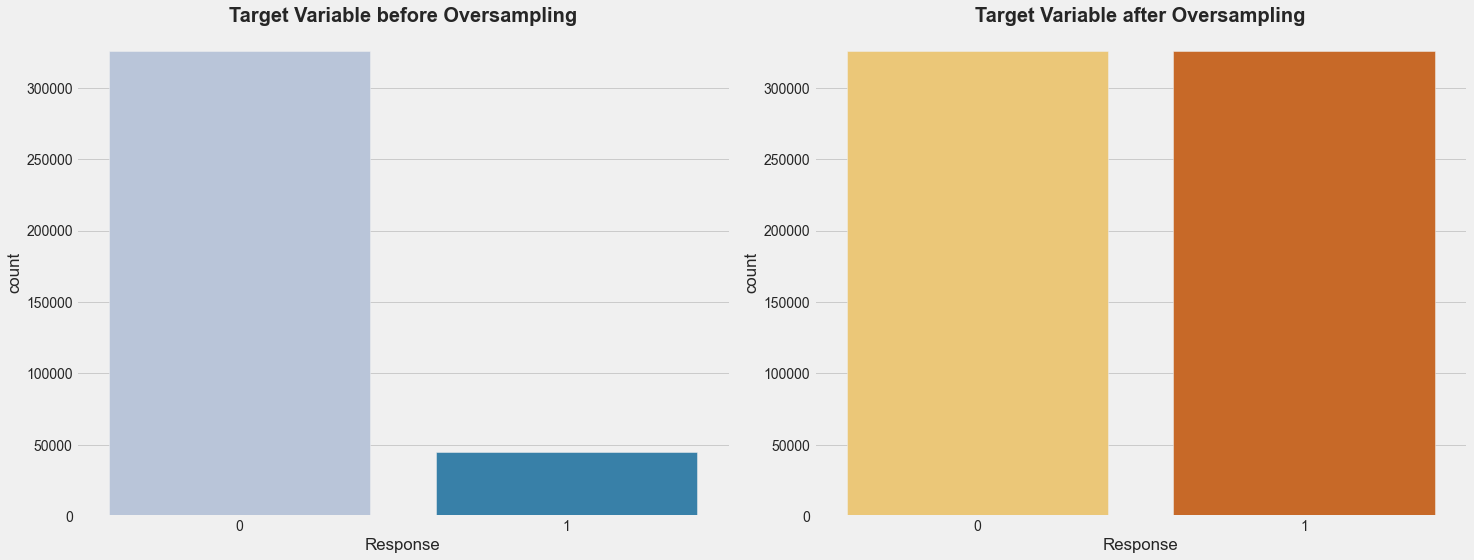

In [172]:
fig, ax = plt.subplots(1, 2, figsize = (20.7, 8))

sns.countplot(
    x = 'Response',
    data = data_preprocess_oversampling,
    palette = 'PuBu',
    ax = ax[0]
)

sns.countplot(
    x = 'Response',
    data = data_oversampling,
    palette = 'YlOrBr',
    ax = ax[1]
)

ax[0].set_title('Target Variable before Oversampling', fontsize = 20, fontweight = 'bold')
ax[1].set_title('Target Variable after Oversampling', fontsize = 20, fontweight = 'bold')

plt.tight_layout()

In [173]:
print(data_preprocess.shape)
data_preprocess.head()

(370789, 20)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Region_Code_Encoding,Vehicle_Age_Encoding,Vehicle_Damage_Encoding,Policy_Sales_Channel_Encoding,Age_log,Annual_Premium_log
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,1,0.187163,2,1,0.199385,3.784190,10.607921
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1,0.127662,1,0,0.199385,4.330733,10.420375
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,1,0.187163,2,1,0.199385,3.850148,10.553049
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,1,0.112760,0,0,0.028624,3.044522,10.261826
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,0,0.121776,0,0,0.028624,3.367296,10.221796


In [174]:
print(data_oversampling.shape)
data_oversampling.head()

(651268, 12)


,Gender_Male,Gender_Female,Age_log,Driving_License,Region_Code_Encoding,Previously_Insured,Vehicle_Age_Encoding,Vehicle_Damage_Encoding,Annual_Premium,Policy_Sales_Channel_Encoding,Vintage,Response
0,1,0,3.784190,1,0.187163,0,2,1,40454.0,0.199385,217,1
1,1,0,4.330733,1,0.127662,0,1,0,33536.0,0.199385,183,0
2,1,0,3.850148,1,0.187163,0,2,1,38294.0,0.199385,27,1
3,1,0,3.044522,1,0.112760,1,0,0,28619.0,0.028624,203,0
4,0,1,3.367296,1,0.121776,1,0,0,27496.0,0.028624,39,0


In [175]:
data_eda_viz = data.copy()
print(data_eda_viz.shape)
data_eda_viz.head()

(381109, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [176]:
data_eda_viz['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [177]:
dummies_Gender = pd.get_dummies(data_eda_viz['Gender'], prefix = 'Gender')
data_eda_viz = pd.concat([data_eda_viz, dummies_Gender], axis = 1)
data_eda_viz[['Gender', 'Gender_Male', 'Gender_Female']].head()

,Gender,Gender_Male,Gender_Female
0,Male,1,0
1,Male,1,0
2,Male,1,0
3,Male,1,0
4,Female,0,1


In [178]:
data_eda_viz['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [179]:
def driving_license(x):
    if x['Driving_License'] == 1:
        license = 'Yes'
    else:
        license = 'No'
    return license
data_eda_viz['Driving_License'] = data_eda_viz.apply(lambda x: driving_license(x), axis =1)
data_eda_viz['Driving_License'].value_counts()

Yes    380297
No        812
Name: Driving_License, dtype: int64

In [180]:
dummies_Driving_License = pd.get_dummies(data_eda_viz['Driving_License'], prefix = 'Driving_License')
data_eda_viz = pd.concat([data_eda_viz, dummies_Driving_License], axis = 1)
data_eda_viz[['Driving_License', 'Driving_License_Yes', 'Driving_License_No']].head()

,Driving_License,Driving_License_Yes,Driving_License_No
0,Yes,1,0
1,Yes,1,0
2,Yes,1,0
3,Yes,1,0
4,Yes,1,0


In [181]:
data['Region_Code'].value_counts().head()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
Name: Region_Code, dtype: int64

In [182]:
def segment_region_code(x):
    if x['Region_Code'] == 28.0:
        segment = 'West Bengal'
    elif x['Region_Code'] == 8.0:
        segment = 'Haryana'
    elif x['Region_Code'] == 46.0:
        segment = 'Goa'
    elif x['Region_Code'] == 41.0:
        segment = 'Andra Pradesh'
    elif x['Region_Code'] == 15.0:
        segment = 'Maharashtra'
    else:
        segment = 'others'
    return segment
data_eda_viz['Region_Code_Group'] = data_eda_viz.apply(lambda x: segment_region_code(x), axis = 1)
data_eda_viz['Region_Code_Group'].value_counts()

others           189497
West Bengal      106415
Haryana           33877
Goa               19749
Andra Pradesh     18263
Maharashtra       13308
Name: Region_Code_Group, dtype: int64

In [183]:
dummies_Region_Code = pd.get_dummies(data_eda_viz['Region_Code_Group'], prefix = 'Region_Code')
data_eda_viz = pd.concat([data_eda_viz, dummies_Region_Code], axis = 1)

data_eda_viz[['Region_Code_Group', 'Region_Code_West Bengal', 'Region_Code_Haryana', 'Region_Code_Goa', 'Region_Code_Andra Pradesh', 'Region_Code_Maharashtra', 'Region_Code_others']].head()

,Region_Code_Group,Region_Code_West Bengal,Region_Code_Haryana,Region_Code_Goa,Region_Code_Andra Pradesh,Region_Code_Maharashtra,Region_Code_others
0,West Bengal,1,0,0,0,0,0
1,others,0,0,0,0,0,1
2,West Bengal,1,0,0,0,0,0
3,others,0,0,0,0,0,1
4,Andra Pradesh,0,0,0,1,0,0


In [184]:
data_eda_viz['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [185]:
def previously_insured(x):
    if x['Previously_Insured'] == 1:
        prev_insured = 'Yes'
    else:
        prev_insured = 'No'
    return prev_insured
data_eda_viz['Previously_Insured'] = data_eda_viz.apply(lambda x: previously_insured(x), axis =1)
data_eda_viz['Previously_Insured'].value_counts()

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64

In [186]:
dummies_Previously_Insured = pd.get_dummies(data_eda_viz['Previously_Insured'], prefix = 'Previously_Insured')
data_eda_viz = pd.concat([data_eda_viz, dummies_Previously_Insured], axis = 1)

data_eda_viz[['Previously_Insured', 'Previously_Insured_Yes', 'Previously_Insured_No']].head()

,Previously_Insured,Previously_Insured_Yes,Previously_Insured_No
0,No,0,1
1,No,0,1
2,No,0,1
3,Yes,1,0
4,Yes,1,0


In [187]:
data_eda_viz['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [188]:
oe_va = OrdinalEncoder(categories = [['< 1 Year', '1-2 Year', '> 2 Years']])
data_eda_viz['Vehicle_Age_Num'] = oe_va.fit_transform(data_eda_viz.loc[:, ['Vehicle_Age']])
data_eda_viz['Vehicle_Age_Num'].value_counts()

1.0    200316
0.0    164786
2.0     16007
Name: Vehicle_Age_Num, dtype: int64

In [189]:
data_eda_viz['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [190]:
dummies_Vehicle_Damage = pd.get_dummies(data_eda_viz['Vehicle_Damage'], prefix = 'Vehicle_Damage')
data_eda_viz = pd.concat([data_eda_viz, dummies_Vehicle_Damage], axis = 1)
data_eda_viz[['Vehicle_Damage', 'Vehicle_Damage_Yes', 'Vehicle_Damage_No']].head()

,Vehicle_Damage,Vehicle_Damage_Yes,Vehicle_Damage_No
0,Yes,1,0
1,No,0,1
2,Yes,1,0
3,No,0,1
4,No,0,1


In [191]:
data_eda_viz['Policy_Sales_Channel'].value_counts().head()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
Name: Policy_Sales_Channel, dtype: int64

In [192]:
def segment_policy_sales_channel(x):
    if x['Policy_Sales_Channel'] == 152.0:
        segment = 'Internet'
    elif x['Policy_Sales_Channel'] == 26.0:
        segment = 'Direct Response'
    elif x['Policy_Sales_Channel'] == 124.0:
        segment = 'Independent Agencies'
    elif x['Policy_Sales_Channel'] == 160.0:
        segment = 'Affinity Group'
    elif x['Policy_Sales_Channel'] == 156.0:
        segment = 'Exclusive/Captive Agents'
    else:
        segment = 'others'
    return segment
data_eda_viz['Policy_Sales_Channel_Group'] = data_eda_viz.apply(lambda x: segment_policy_sales_channel(x), axis = 1)
data_eda_viz['Policy_Sales_Channel_Group'].value_counts()

Internet                    134784
Direct Response              79700
Independent Agencies         73995
others                       60190
Affinity Group               21779
Exclusive/Captive Agents     10661
Name: Policy_Sales_Channel_Group, dtype: int64

In [193]:
dummies_Policy_Sales_Channel = pd.get_dummies(data_eda_viz['Policy_Sales_Channel_Group'], prefix = 'Policy_Sales_Channel')
data_eda_viz = pd.concat([data_eda_viz, dummies_Policy_Sales_Channel], axis = 1)

data_eda_viz[['Policy_Sales_Channel_Group', 'Policy_Sales_Channel_Internet', 'Policy_Sales_Channel_Direct Response', 'Policy_Sales_Channel_Independent Agencies', 'Policy_Sales_Channel_Affinity Group', 'Policy_Sales_Channel_Exclusive/Captive Agents', 'Policy_Sales_Channel_others']].head()

,Policy_Sales_Channel_Group,Policy_Sales_Channel_Internet,Policy_Sales_Channel_Direct Response,Policy_Sales_Channel_Independent Agencies,Policy_Sales_Channel_Affinity Group,Policy_Sales_Channel_Exclusive/Captive Agents,Policy_Sales_Channel_others
0,Direct Response,0,1,0,0,0,0
1,Direct Response,0,1,0,0,0,0
2,Direct Response,0,1,0,0,0,0
3,Internet,1,0,0,0,0,0
4,Internet,1,0,0,0,0,0


In [194]:
data_eda_viz['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [195]:
data_eda_viz['Age'].value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

In [196]:
def segment_age(x):
    if x['Age'] > 17 and x['Age'] <= 30:
        segment = '17y - 30y'
    elif x['Age'] > 30 and x['Age'] <= 45:
        segment = '31y - 45y'
    elif x['Age'] > 45 and x['Age'] <= 55:
        segment = '46y - 55y'
    elif x['Age'] > 55:
        segment = '> 55y'
    return segment
data_eda_viz['Age_Group'] = data_eda_viz.apply(lambda x: segment_age(x), axis = 1)
data_eda_viz.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Vehicle_Damage_No,Vehicle_Damage_Yes,Policy_Sales_Channel_Group,Policy_Sales_Channel_Affinity Group,Policy_Sales_Channel_Direct Response,Policy_Sales_Channel_Exclusive/Captive Agents,Policy_Sales_Channel_Independent Agencies,Policy_Sales_Channel_Internet,Policy_Sales_Channel_others,Age_Group
0,1,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,...,0,1,Direct Response,0,1,0,0,0,0,31y - 45y
1,2,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,...,1,0,Direct Response,0,1,0,0,0,0,> 55y
2,3,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,...,0,1,Direct Response,0,1,0,0,0,0,46y - 55y
3,4,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,...,1,0,Internet,0,0,0,0,1,0,17y - 30y
4,5,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,...,1,0,Internet,0,0,0,0,1,0,17y - 30y


In [197]:
data_eda_viz['Age_Group'].value_counts()

17y - 30y    161461
31y - 45y     95883
> 55y         62216
46y - 55y     61549
Name: Age_Group, dtype: int64

In [198]:
data_eda_viz['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [199]:
data_eda_viz['Annual_Premium'].value_counts()

2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64

In [200]:
def segment_annual_premium(x):
    if x['Annual_Premium'] < 5000:
        segment = '< 5K'
    elif x['Annual_Premium'] > 5000 and x['Annual_Premium'] <= 30000:
        segment = '5K - 30K'
    elif x['Annual_Premium'] > 30000 and x['Annual_Premium'] <= 40000:
        segment = '30K - 40K'
    elif x['Annual_Premium'] > 40000 and x['Annual_Premium'] <= 50000:
        segment = '40K - 50K'
    elif x['Annual_Premium'] > 50000:
        segment = '> 50K'
    return segment
data_eda_viz['Annual_Premium_Group'] = data_eda_viz.apply(lambda x: segment_annual_premium(x), axis = 1)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [201]:
data_eda_viz['Annual_Premium_Group'].value_counts()

30K - 40K    125050
5K - 30K     101200
< 5K          64877
40K - 50K     57778
> 50K         32204
Name: Annual_Premium_Group, dtype: int64

In [202]:
data_eda_viz['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [203]:
data_eda_viz['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [204]:
def vintage_month(x):
    to_month = int(round(x['Vintage'] / 30, 0))
    return to_month
data_eda_viz['Vintage_Month'] = data_eda_viz.apply(lambda x: vintage_month(x), axis = 1)
data_eda_viz.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Policy_Sales_Channel_Group,Policy_Sales_Channel_Affinity Group,Policy_Sales_Channel_Direct Response,Policy_Sales_Channel_Exclusive/Captive Agents,Policy_Sales_Channel_Independent Agencies,Policy_Sales_Channel_Internet,Policy_Sales_Channel_others,Age_Group,Annual_Premium_Group,Vintage_Month
0,1,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,...,Direct Response,0,1,0,0,0,0,31y - 45y,40K - 50K,7
1,2,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,...,Direct Response,0,1,0,0,0,0,> 55y,30K - 40K,6
2,3,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,...,Direct Response,0,1,0,0,0,0,46y - 55y,30K - 40K,1
3,4,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,...,Internet,0,0,0,0,1,0,17y - 30y,5K - 30K,7
4,5,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,...,Internet,0,0,0,0,1,0,17y - 30y,5K - 30K,1


In [205]:
data_eda_viz['Vintage_Month'].value_counts()

4     40982
8     40920
2     40743
6     40649
1     38320
3     38230
5     38067
9     38013
7     37882
10    19507
0      7796
Name: Vintage_Month, dtype: int64

In [206]:
def vintage_month_group(x):
    to_month = x['Vintage_Month']
    
    if to_month < 4:
        month_group = '< 4 Month'
    elif to_month >= 4 and to_month <= 7:
        month_group = '4-7 Month'
    elif to_month > 7:
        month_group = '> 7 Month'
    return month_group

In [207]:
data_eda_viz['Vintage_Month_Group'] = data_eda_viz.apply(lambda x: vintage_month_group(x), axis = 1)
data_eda_viz.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Policy_Sales_Channel_Affinity Group,Policy_Sales_Channel_Direct Response,Policy_Sales_Channel_Exclusive/Captive Agents,Policy_Sales_Channel_Independent Agencies,Policy_Sales_Channel_Internet,Policy_Sales_Channel_others,Age_Group,Annual_Premium_Group,Vintage_Month,Vintage_Month_Group
0,1,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,...,0,1,0,0,0,0,31y - 45y,40K - 50K,7,4-7 Month
1,2,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,...,0,1,0,0,0,0,> 55y,30K - 40K,6,4-7 Month
2,3,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,...,0,1,0,0,0,0,46y - 55y,30K - 40K,1,< 4 Month
3,4,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,...,0,0,0,0,1,0,17y - 30y,5K - 30K,7,4-7 Month
4,5,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,...,0,0,0,0,1,0,17y - 30y,5K - 30K,1,< 4 Month


In [208]:
data_eda_viz['Vintage_Month_Group'].value_counts()

4-7 Month    157580
< 4 Month    125089
> 7 Month     98440
Name: Vintage_Month_Group, dtype: int64

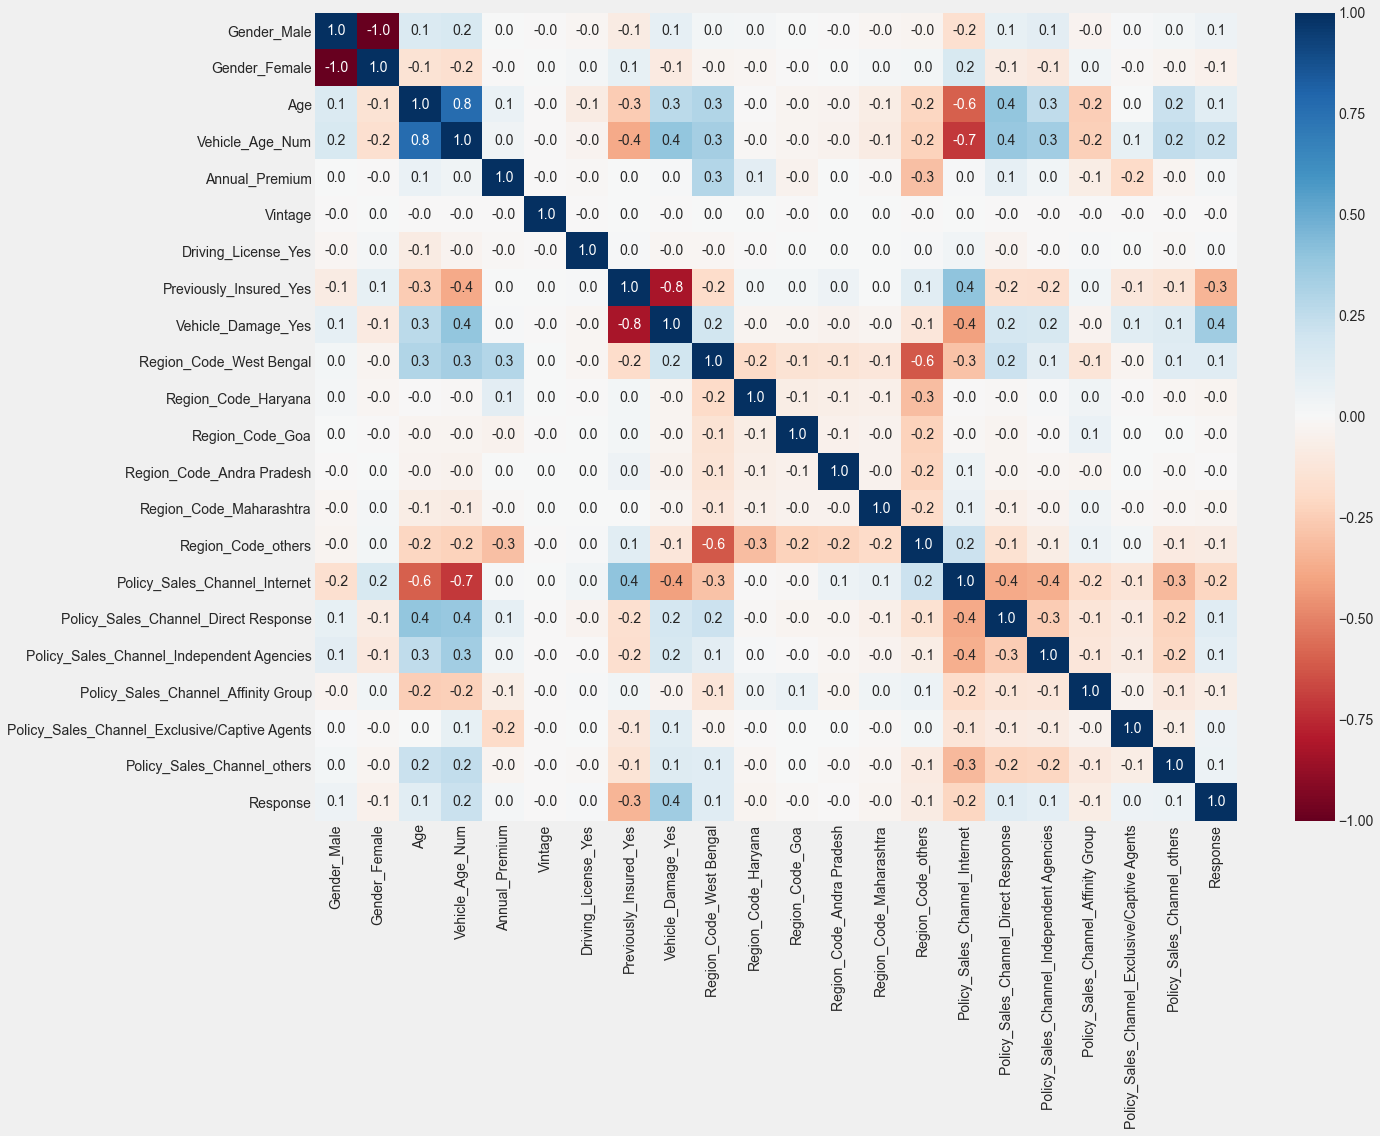

In [209]:
feature = [
    'Gender_Male', 'Gender_Female',
    'Age',
    'Vehicle_Age_Num',
    'Annual_Premium',
    'Vintage',
    'Driving_License_Yes',
    'Previously_Insured_Yes',
    'Vehicle_Damage_Yes',
    'Region_Code_West Bengal', 'Region_Code_Haryana', 'Region_Code_Goa', 'Region_Code_Andra Pradesh', 'Region_Code_Maharashtra', 'Region_Code_others',
    'Policy_Sales_Channel_Internet', 'Policy_Sales_Channel_Direct Response', 'Policy_Sales_Channel_Independent Agencies', 'Policy_Sales_Channel_Affinity Group', 'Policy_Sales_Channel_Exclusive/Captive Agents', 'Policy_Sales_Channel_others'
]

target = ['Response']
corr_ = feature + target

check_corr = data_eda_viz[corr_].corr()
plt.figure(figsize = (20.7, 16))
sns.heatmap(
    check_corr,
    annot = True,
    fmt = '.1f',
    cmap = 'RdBu'
)

plt.tight_layout()

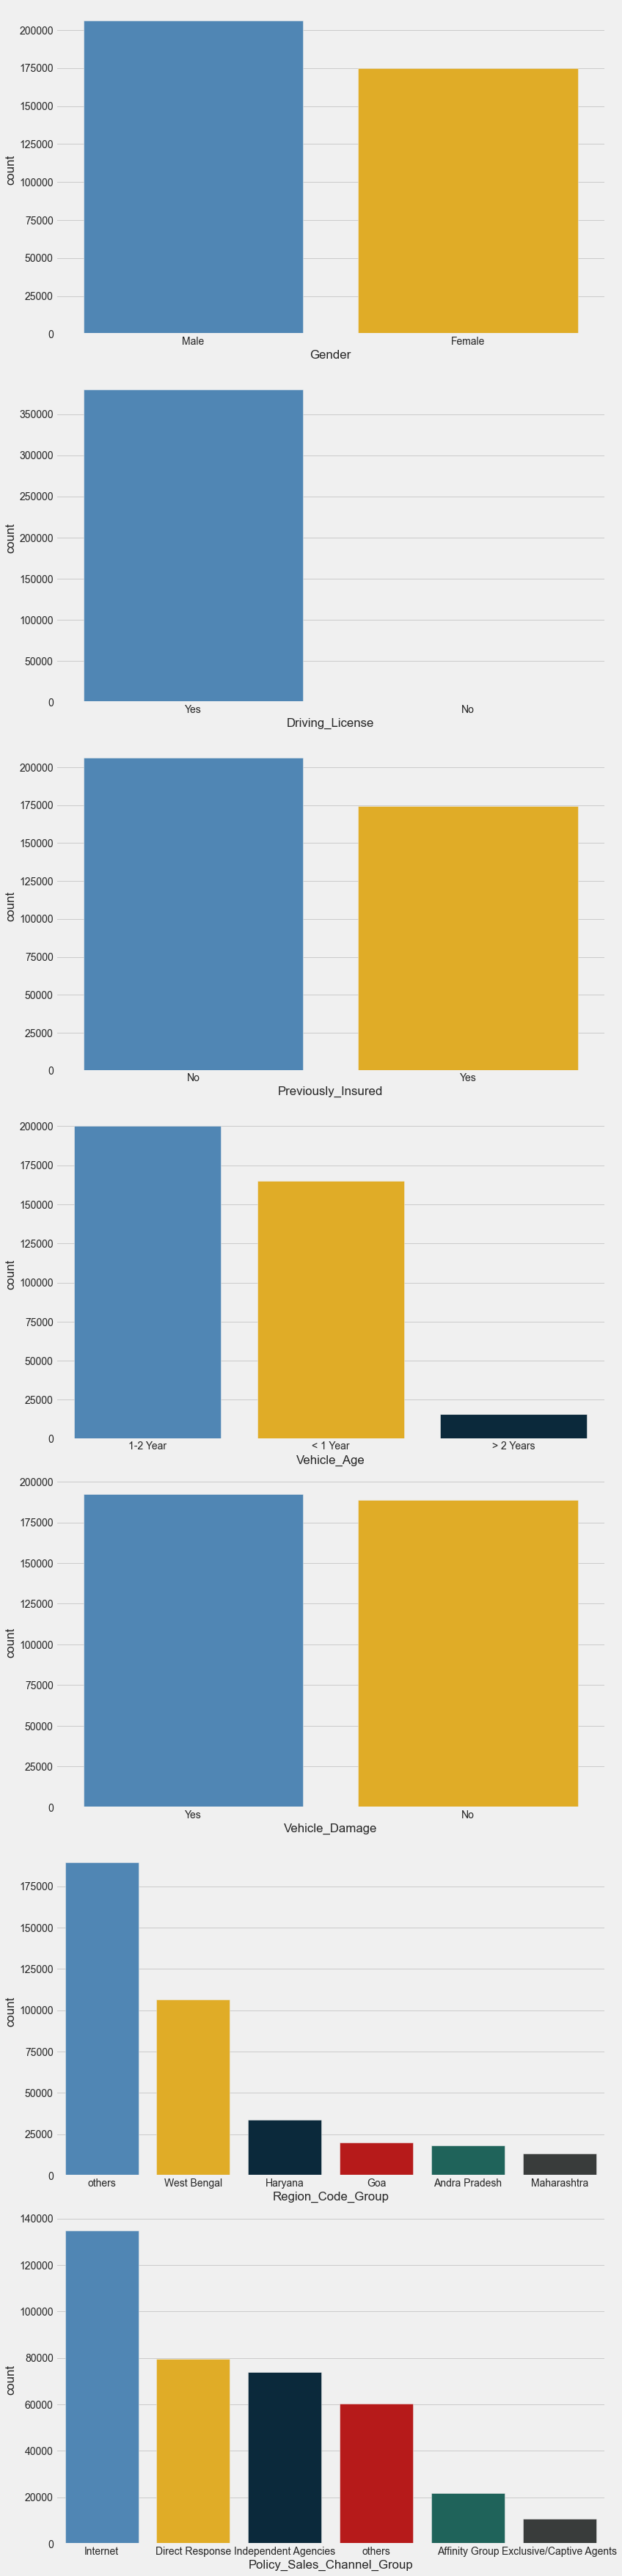

In [213]:
features_cat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Region_Code_Group', 'Policy_Sales_Channel_Group']
plt.figure(figsize = (12, 49))
for i in range(0, len(features_cat)):
    plt.subplot(7, 1, i + 1)
    ax = sns.countplot(
        x = data_eda_viz[features_cat[i]],
        order = data_eda_viz[features_cat[i]].value_counts().index,
        palette = ['#3f88c5', '#ffba08', '#032b43', '#d00000', '#136f63', '#383d3b']
        # ['#30bced', '#fc5130', '#737382', '#fffaff', '#e0777d', '#050401']
        # ['#235789', '#f1d302', '#ed1c24', '#fdfffc', '#020100', '#3d0c11']
    )
    
plt.tight_layout()


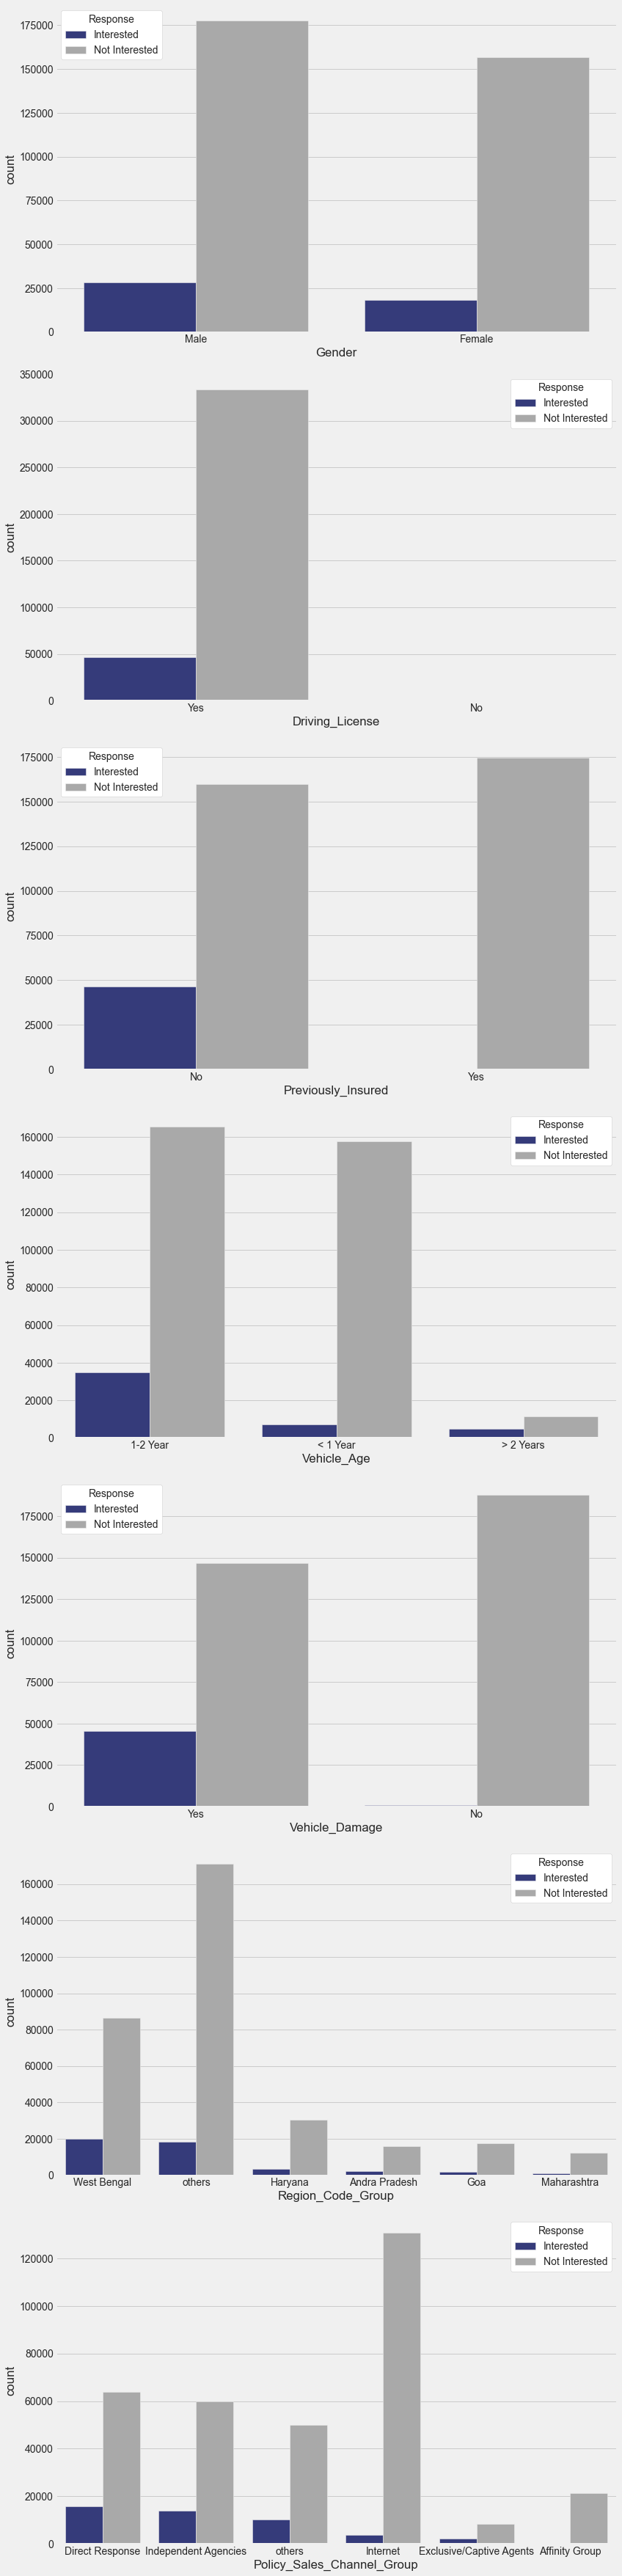

In [214]:
plt.figure(figsize = (12, 49))
for i in range(0, len(features_cat)):
    plt.subplot(7, 1, i + 1)
    ax = sns.countplot(
        x = data_eda_viz[features_cat[i]],
        hue = data_eda_viz['Response'],
        hue_order = [1, 0],
        palette = ['#293286', 'darkgray'],
        order = pd.crosstab(data_eda_viz[features_cat[i]], data_eda_viz['Response']).sort_values(1, ascending = False).index,
    )
    
    L = ax.legend(['Interested', 'Not Interested'], fontsize = 14, frameon = True)
    L.set_title('Response', prop = {'size' : 14})
    L.get_frame().set_alpha(1)
    L.get_frame().set_facecolor((1, 1, 1, 1))
    
plt.tight_layout()

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [216]:
gender_distribution = data_eda_viz.groupby(['Gender', 'Response']).count()[['id']]

gender = data_eda_viz.groupby(['Gender']).count()[['id']]

gender_distribution['percentage'] = gender_distribution.div(gender, level = 'Gender') * 100
gender_distribution = gender_distribution.reset_index()
gender_distribution.columns = ['Gender', 'Response', '#of customers', 'percentage']
gender_distribution

,Gender,Response,#of customers,percentage
0,Female,0,156835,89.609759
1,Female,1,18185,10.390241
2,Male,0,177564,86.158893
3,Male,1,28525,13.841107


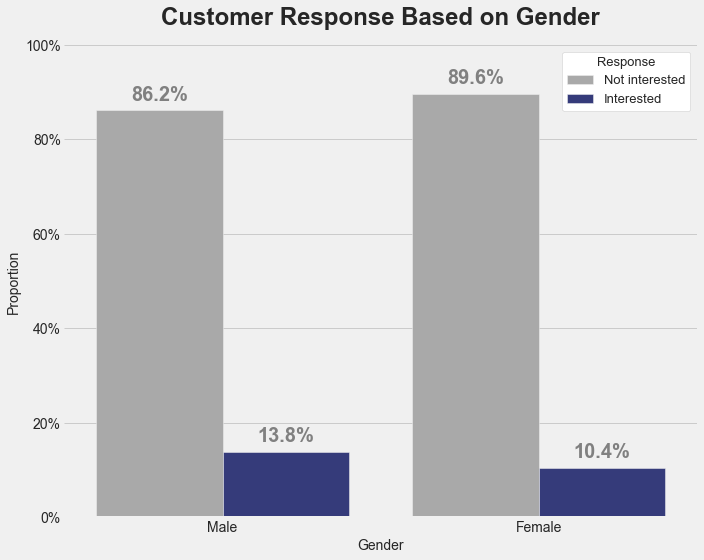

In [217]:

color_focus_gender = ['#293286' if (x == 1) else 'darkgray' for x in gender_distribution['Response']]
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'Gender',
    y = 'percentage',
    hue = 'Response',
    order = gender_distribution.iloc[gender_distribution[gender_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Gender'],
    palette = color_focus_gender,
    data = gender_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True)
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Gender', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

In [220]:
age_group_distribution = data_eda_viz.groupby(['Age_Group', 'Response']).count()[['id']]

age_group = data_eda_viz.groupby(['Age_Group']).count()[['id']]

age_group_distribution['percentage'] = age_group_distribution.div(age_group, level = 'Age_Group') * 100
age_group_distribution = age_group_distribution.reset_index()
age_group_distribution.columns = ['Age_Group', 'Response', '#of customers', 'percentage']
age_group_distribution

,Age_Group,Response,#of customers,percentage
0,17y - 30y,0,154278,95.551248
1,17y - 30y,1,7183,4.448752
2,31y - 45y,0,75629,78.876339
3,31y - 45y,1,20254,21.123661
4,46y - 55y,0,49426,80.303498
5,46y - 55y,1,12123,19.696502
6,> 55y,0,55066,88.507779
7,> 55y,1,7150,11.492221


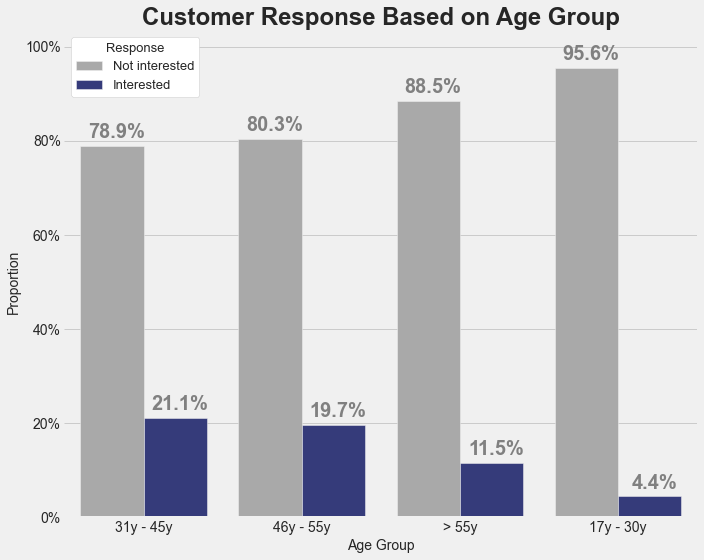

In [221]:

color_focus_age_group = ['#293286' if (x == 1) else 'darkgray' for x in age_group_distribution['Response']]
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'Age_Group',
    y = 'percentage',
    hue = 'Response',
    order = age_group_distribution.iloc[age_group_distribution[age_group_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Age_Group'],
    palette = color_focus_age_group,
    data = age_group_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True, bbox_to_anchor = (0, 1.03), loc = 'upper left')
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Age Group', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (5, 8), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Age Group', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

In [222]:
driving_license_distribution = data_eda_viz.groupby(['Driving_License', 'Response']).count()[['id']]

driving_license = data_eda_viz.groupby(['Driving_License']).count()[['id']]

driving_license_distribution['percentage'] = driving_license_distribution.div(driving_license, level = 'Driving_License') * 100
driving_license_distribution = driving_license_distribution.reset_index()
driving_license_distribution.columns = ['Driving_License', 'Response', '#of customers', 'percentage']
driving_license_distribution

,Driving_License,Response,#of customers,percentage
0,No,0,771,94.950739
1,No,1,41,5.049261
2,Yes,0,333628,87.728276
3,Yes,1,46669,12.271724


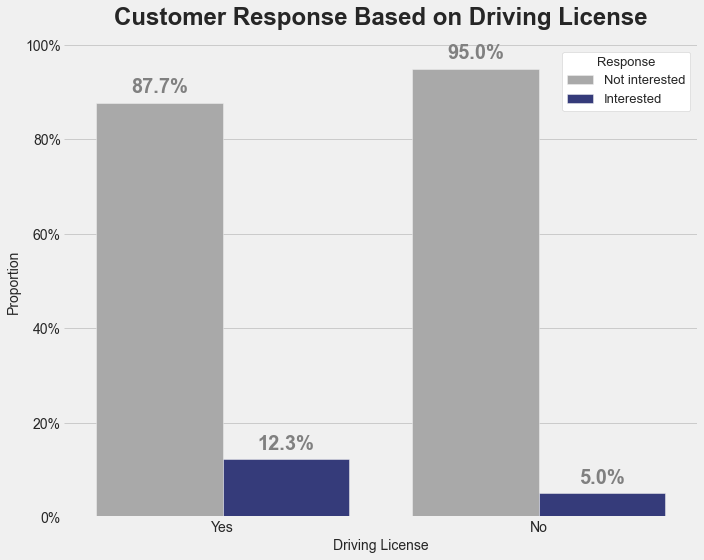

In [223]:

color_focus_driving_license = ['#293286' if (x == 1) else 'darkgray' for x in driving_license_distribution['Response']]
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'Driving_License',
    y = 'percentage',
    hue = 'Response',
    order = driving_license_distribution.iloc[driving_license_distribution[driving_license_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Driving_License'],
    palette = color_focus_driving_license,
    data = driving_license_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True)
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Driving License', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Driving License', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

In [224]:
region_code_group_distribution = data_eda_viz.groupby(['Region_Code_Group', 'Response']).count()[['id']]

region_code_group = data_eda_viz.groupby(['Region_Code_Group']).count()[['id']]

region_code_group_distribution['percentage'] = region_code_group_distribution.div(region_code_group, level = 'Region_Code_Group') * 100
region_code_group_distribution = region_code_group_distribution.reset_index()
region_code_group_distribution.columns = ['Region_Code_Group', 'Response', '#of customers', 'percentage']
region_code_group_distribution

,Region_Code_Group,Response,#of customers,percentage
0,Andra Pradesh,0,16039,87.822373
1,Andra Pradesh,1,2224,12.177627
2,Goa,0,17717,89.710871
3,Goa,1,2032,10.289129
4,Haryana,0,30620,90.385807
5,Haryana,1,3257,9.614193
6,Maharashtra,0,12350,92.801323
7,Maharashtra,1,958,7.198677
8,West Bengal,0,86498,81.283654
9,West Bengal,1,19917,18.716346


In [225]:
region_code_group_distribution = region_code_group_distribution[region_code_group_distribution['Region_Code_Group'] != 'others']
region_code_group_distribution

,Region_Code_Group,Response,#of customers,percentage
0,Andra Pradesh,0,16039,87.822373
1,Andra Pradesh,1,2224,12.177627
2,Goa,0,17717,89.710871
3,Goa,1,2032,10.289129
4,Haryana,0,30620,90.385807
5,Haryana,1,3257,9.614193
6,Maharashtra,0,12350,92.801323
7,Maharashtra,1,958,7.198677
8,West Bengal,0,86498,81.283654
9,West Bengal,1,19917,18.716346


In [227]:
west_bengal = data_eda_viz[data_eda_viz['Region_Code_Group'] == 'West Bengal']
west_bengal

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Policy_Sales_Channel_Affinity Group,Policy_Sales_Channel_Direct Response,Policy_Sales_Channel_Exclusive/Captive Agents,Policy_Sales_Channel_Independent Agencies,Policy_Sales_Channel_Internet,Policy_Sales_Channel_others,Age_Group,Annual_Premium_Group,Vintage_Month,Vintage_Month_Group
0,1,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,...,0,1,0,0,0,0,31y - 45y,40K - 50K,7,4-7 Month
2,3,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,...,0,1,0,0,0,0,46y - 55y,30K - 40K,1,< 4 Month
7,8,Female,56,Yes,28.0,No,1-2 Year,Yes,32031.0,26.0,...,0,1,0,0,0,0,> 55y,30K - 40K,2,< 4 Month
13,14,Male,76,Yes,28.0,No,1-2 Year,Yes,36770.0,13.0,...,0,0,0,0,0,1,> 55y,30K - 40K,0,< 4 Month
14,15,Male,71,Yes,28.0,Yes,1-2 Year,No,46818.0,30.0,...,0,0,0,0,0,1,> 55y,40K - 50K,2,< 4 Month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381095,381096,Male,52,Yes,28.0,No,1-2 Year,Yes,38323.0,124.0,...,0,0,0,1,0,0,46y - 55y,30K - 40K,2,< 4 Month
381097,381098,Female,38,Yes,28.0,No,1-2 Year,Yes,52742.0,26.0,...,0,1,0,0,0,0,31y - 45y,> 50K,6,4-7 Month
381099,381100,Female,51,Yes,28.0,No,1-2 Year,Yes,44504.0,26.0,...,0,1,0,0,0,0,46y - 55y,40K - 50K,2,< 4 Month
381100,381101,Female,29,Yes,28.0,No,< 1 Year,Yes,49007.0,124.0,...,0,0,0,1,0,0,17y - 30y,40K - 50K,5,4-7 Month


In [228]:
res_west_bengal = west_bengal[west_bengal['Response'] == 1]
res_west_bengal

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Policy_Sales_Channel_Affinity Group,Policy_Sales_Channel_Direct Response,Policy_Sales_Channel_Exclusive/Captive Agents,Policy_Sales_Channel_Independent Agencies,Policy_Sales_Channel_Internet,Policy_Sales_Channel_others,Age_Group,Annual_Premium_Group,Vintage_Month,Vintage_Month_Group
0,1,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,...,0,1,0,0,0,0,31y - 45y,40K - 50K,7,4-7 Month
2,3,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,...,0,1,0,0,0,0,46y - 55y,30K - 40K,1,< 4 Month
7,8,Female,56,Yes,28.0,No,1-2 Year,Yes,32031.0,26.0,...,0,1,0,0,0,0,> 55y,30K - 40K,2,< 4 Month
26,27,Female,51,Yes,28.0,No,1-2 Year,Yes,38341.0,124.0,...,0,0,0,1,0,0,46y - 55y,30K - 40K,2,< 4 Month
57,58,Male,54,Yes,28.0,No,1-2 Year,Yes,25205.0,26.0,...,0,1,0,0,0,0,46y - 55y,5K - 30K,9,> 7 Month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381031,381032,Female,49,Yes,28.0,No,> 2 Years,Yes,33891.0,4.0,...,0,0,0,0,0,1,46y - 55y,30K - 40K,3,< 4 Month
381061,381062,Female,41,Yes,28.0,No,1-2 Year,Yes,37377.0,124.0,...,0,0,0,1,0,0,31y - 45y,30K - 40K,3,< 4 Month
381073,381074,Female,46,Yes,28.0,No,1-2 Year,Yes,34741.0,124.0,...,0,0,0,1,0,0,46y - 55y,30K - 40K,6,4-7 Month
381075,381076,Female,61,Yes,28.0,No,1-2 Year,Yes,43875.0,26.0,...,0,1,0,0,0,0,> 55y,40K - 50K,5,4-7 Month


In [229]:
res_west_bengal['Annual_Premium'].sum()

777015063.0

In [230]:
data_eda_viz.groupby(['Region_Code_Group']).sum()[['Annual_Premium']].sort_values('Annual_Premium', ascending = False)

,Annual_Premium
Region_Code_Group,
others,4.801212e+09
West Bengal,4.114947e+09
Haryana,1.235426e+09
Andra Pradesh,5.652239e+08
Goa,5.373115e+08
Maharashtra,3.942431e+08


In [231]:
data_eda_viz.groupby(['Region_Code_Group', 'Response']).sum()[['Annual_Premium']].sort_values('Annual_Premium', ascending = False).sort_values('Response', ascending = False)

,,Annual_Premium
Region_Code_Group,Response,
West Bengal,1,7.770151e+08
others,1,4.396683e+08
Haryana,1,1.129725e+08
Andra Pradesh,1,6.674880e+07
Goa,1,5.312392e+07
Maharashtra,1,2.669861e+07
others,0,4.361544e+09
West Bengal,0,3.337932e+09
Haryana,0,1.122453e+09


In [232]:
data_eda_viz.groupby(['Region_Code', 'Response']).sum()[['Annual_Premium']].sort_values('Response', ascending = False).sort_values('Annual_Premium', ascending = False)

,,Annual_Premium
Region_Code,Response,
28.0,0,3.337932e+09
8.0,0,1.122453e+09
28.0,1,7.770151e+08
41.0,0,4.984751e+08
46.0,0,4.841875e+08
...,...,...
51.0,1,8.355900e+05
44.0,1,6.959540e+05
20.0,1,6.794910e+05


In [233]:
previously_insured_distribution = data_eda_viz.groupby(['Previously_Insured', 'Response']).count()[['id']]

previously_insured = data_eda_viz.groupby(['Previously_Insured']).count()[['id']]

previously_insured_distribution['percentage'] = previously_insured_distribution.div(previously_insured, level = 'Previously_Insured') * 100
previously_insured_distribution = previously_insured_distribution.reset_index()
previously_insured_distribution.columns = ['Previously_Insured', 'Response', '#of customers', 'percentage']
previously_insured_distribution

,Previously_Insured,Response,#of customers,percentage
0,No,0,159929,77.454584
1,No,1,46552,22.545416
2,Yes,0,174470,99.909522
3,Yes,1,158,0.090478


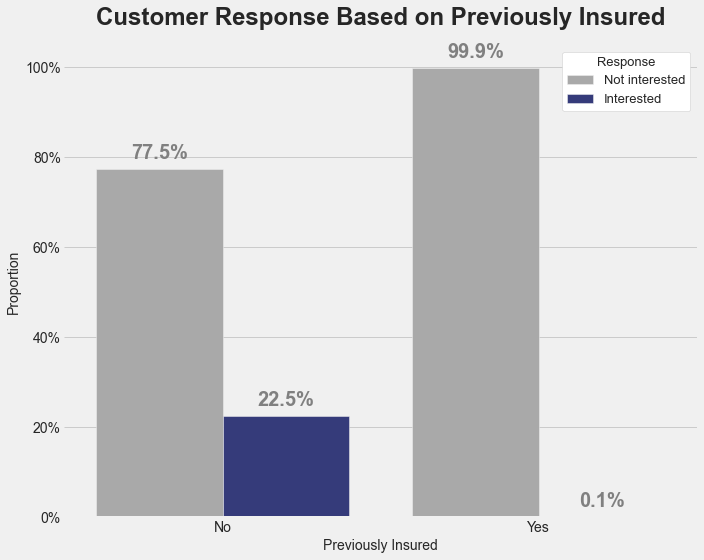

In [234]:

color_focus_previously_insured = ['#293286' if (x == 1) else 'darkgray' for x in previously_insured_distribution['Response']]
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'Previously_Insured',
    y = 'percentage',
    hue = 'Response',
    order = previously_insured_distribution.iloc[previously_insured_distribution[previously_insured_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Previously_Insured'],
    palette = color_focus_previously_insured,
    data = previously_insured_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True)
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Previously Insured', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Previously Insured', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

In [235]:
vehicle_age_distribution = data_eda_viz.groupby(['Vehicle_Age', 'Response']).count()[['id']]

vehicle_age = data_eda_viz.groupby(['Vehicle_Age']).count()[['id']]

vehicle_age_distribution['percentage'] = vehicle_age_distribution.div(vehicle_age, level = 'Vehicle_Age') * 100
vehicle_age_distribution = vehicle_age_distribution.reset_index()
vehicle_age_distribution.columns = ['Vehicle_Age', 'Response', '#of customers', 'percentage']
vehicle_age_distribution

,Vehicle_Age,Response,#of customers,percentage
0,1-2 Year,0,165510,82.624453
1,1-2 Year,1,34806,17.375547
2,< 1 Year,0,157584,95.629483
3,< 1 Year,1,7202,4.370517
4,> 2 Years,0,11305,70.625351
5,> 2 Years,1,4702,29.374649


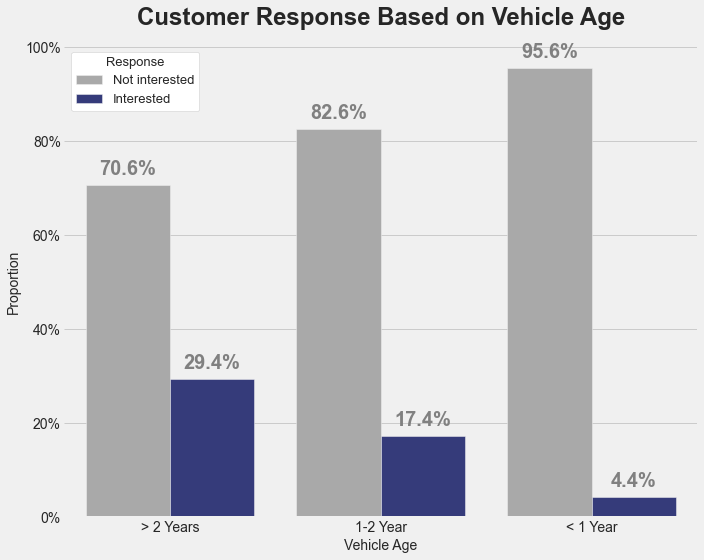

In [236]:

color_focus_vehicle_age = ['#293286' if (x == 1) else 'darkgray' for x in vehicle_age_distribution['Response']]
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'Vehicle_Age',
    y = 'percentage',
    hue = 'Response',
    order = vehicle_age_distribution.iloc[vehicle_age_distribution[vehicle_age_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Vehicle_Age'],
    palette = color_focus_vehicle_age,
    data = vehicle_age_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True)
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Vehicle Age', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Vehicle Age', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

In [237]:
vehicle_damage_distribution = data_eda_viz.groupby(['Vehicle_Damage', 'Response']).count()[['id']]

vehicle_damage = data_eda_viz.groupby(['Vehicle_Damage']).count()[['id']]

vehicle_damage_distribution['percentage'] = vehicle_damage_distribution.div(vehicle_damage, level = 'Vehicle_Damage') * 100
vehicle_damage_distribution = vehicle_damage_distribution.reset_index()
vehicle_damage_distribution.columns = ['Vehicle_Damage', 'Response', '#of customers', 'percentage']
vehicle_damage_distribution

,Vehicle_Damage,Response,#of customers,percentage
0,No,0,187714,99.479586
1,No,1,982,0.520414
2,Yes,0,146685,76.234454
3,Yes,1,45728,23.765546


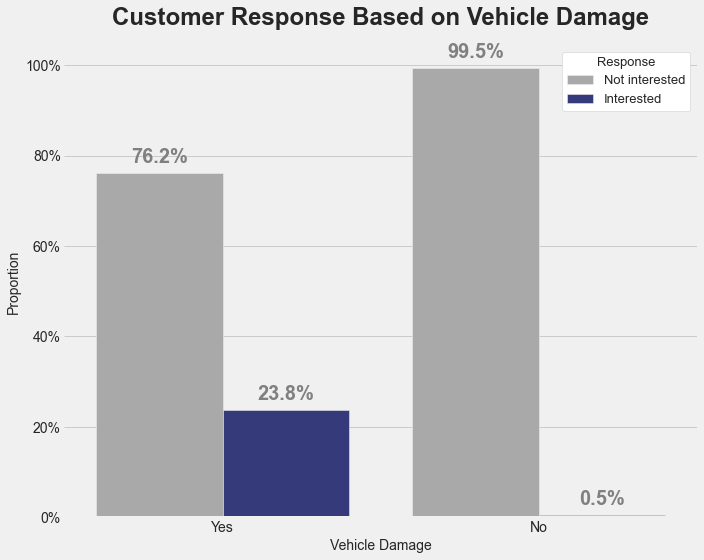

In [238]:

color_focus_vehicle_damage = ['#293286' if (x == 1) else 'darkgray' for x in vehicle_damage_distribution['Response']]
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'Vehicle_Damage',
    y = 'percentage',
    hue = 'Response',
    order = vehicle_damage_distribution.iloc[vehicle_damage_distribution[vehicle_damage_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Vehicle_Damage'],
    palette = color_focus_vehicle_damage,
    data = vehicle_damage_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True)
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Vehicle Damage', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Vehicle Damage', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

In [240]:
annual_premium_group_distribution = data_eda_viz.groupby(['Annual_Premium_Group', 'Response']).count()[['id']]

annual_premium_group = data_eda_viz.groupby(['Annual_Premium_Group']).count()[['id']]

annual_premium_group_distribution['percentage'] = annual_premium_group_distribution.div(annual_premium_group, level = 'Annual_Premium_Group') * 100
annual_premium_group_distribution = annual_premium_group_distribution.reset_index()
annual_premium_group_distribution.columns = ['Annual_Premium_Group', 'Response', '#of customers', 'percentage']
annual_premium_group_distribution

,Annual_Premium_Group,Response,#of customers,percentage
0,30K - 40K,0,110055,88.008796
1,30K - 40K,1,14995,11.991204
2,40K - 50K,0,49499,85.671017
3,40K - 50K,1,8279,14.328983
4,5K - 30K,0,91168,90.086957
5,5K - 30K,1,10032,9.913043
6,< 5K,0,56372,86.890578
7,< 5K,1,8505,13.109422
8,> 50K,0,27305,84.787604
9,> 50K,1,4899,15.212396


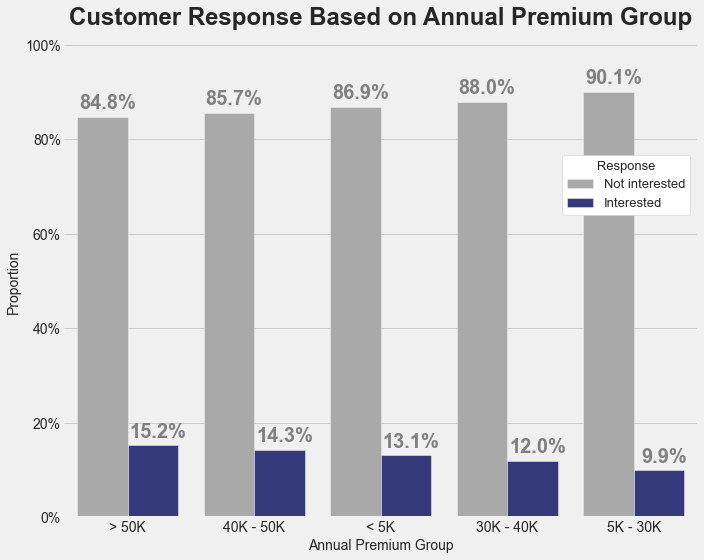

In [241]:

color_focus_annual_premium_group = ['#293286' if (x == 1) else 'darkgray' for x in annual_premium_group_distribution['Response']]
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'Annual_Premium_Group',
    y = 'percentage',
    hue = 'Response',
    order = annual_premium_group_distribution.iloc[annual_premium_group_distribution[annual_premium_group_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Annual_Premium_Group'],
    palette = color_focus_annual_premium_group,
    data = annual_premium_group_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True, bbox_to_anchor = (1, 0.78), loc = 'upper right')
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Annual Premium Group', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (5, 8), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Annual Premium Group', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

In [242]:
policy_sales_channel_group_distribution = data_eda_viz.groupby(['Policy_Sales_Channel_Group', 'Response']).count()[['id']]

policy_sales_channel_group = data_eda_viz.groupby(['Policy_Sales_Channel_Group']).count()[['id']]

policy_sales_channel_group_distribution['percentage'] = policy_sales_channel_group_distribution.div(policy_sales_channel_group, level = 'Policy_Sales_Channel_Group') * 100
policy_sales_channel_group_distribution = policy_sales_channel_group_distribution.reset_index()
policy_sales_channel_group_distribution.columns = ['Policy_Sales_Channel_Group', 'Response', '#of customers', 'percentage']
policy_sales_channel_group_distribution

,Policy_Sales_Channel_Group,Response,#of customers,percentage
0,Affinity Group,0,21304,97.819000
1,Affinity Group,1,475,2.181000
2,Direct Response,0,63809,80.061481
3,Direct Response,1,15891,19.938519
4,Exclusive/Captive Agents,0,8364,78.454179
5,Exclusive/Captive Agents,1,2297,21.545821
6,Independent Agencies,0,59999,81.085208
7,Independent Agencies,1,13996,18.914792
8,Internet,0,130926,97.137642
9,Internet,1,3858,2.862358


In [243]:
policy_sales_channel_group_distribution = policy_sales_channel_group_distribution[policy_sales_channel_group_distribution['Policy_Sales_Channel_Group'] != 'others']
policy_sales_channel_group_distribution

,Policy_Sales_Channel_Group,Response,#of customers,percentage
0,Affinity Group,0,21304,97.819000
1,Affinity Group,1,475,2.181000
2,Direct Response,0,63809,80.061481
3,Direct Response,1,15891,19.938519
4,Exclusive/Captive Agents,0,8364,78.454179
5,Exclusive/Captive Agents,1,2297,21.545821
6,Independent Agencies,0,59999,81.085208
7,Independent Agencies,1,13996,18.914792
8,Internet,0,130926,97.137642
9,Internet,1,3858,2.862358


In [244]:
direct_writers = policy_sales_channel_group_distribution[policy_sales_channel_group_distribution['Policy_Sales_Channel_Group'].isin(['Affinity Group', 'Direct Response', 'Exclusive/Captive Agents', 'Internet'])].reset_index(drop = True)
direct_writers

,Policy_Sales_Channel_Group,Response,#of customers,percentage
0,Affinity Group,0,21304,97.819000
1,Affinity Group,1,475,2.181000
2,Direct Response,0,63809,80.061481
3,Direct Response,1,15891,19.938519
4,Exclusive/Captive Agents,0,8364,78.454179
5,Exclusive/Captive Agents,1,2297,21.545821
6,Internet,0,130926,97.137642
7,Internet,1,3858,2.862358


In [245]:
agency_writers = policy_sales_channel_group_distribution[policy_sales_channel_group_distribution['Policy_Sales_Channel_Group'].isin(['Independent Agencies'])].reset_index(drop = True)
agency_writers

,Policy_Sales_Channel_Group,Response,#of customers,percentage
0,Independent Agencies,0,59999,81.085208
1,Independent Agencies,1,13996,18.914792


In [247]:
color_focus_policy_sales_channel_group = ['#293286' if (x == 1) else 'darkgray' for x in policy_sales_channel_group_distribution['Response']]

In [248]:
direct_writers['Policy_Sales_Channel_Group'].unique()

array(['Affinity Group', 'Direct Response', 'Exclusive/Captive Agents',
       'Internet'], dtype=object)

Text(0.5, 1.02, 'Customer Response Based on Top 5 Sales Channel by Frequency')

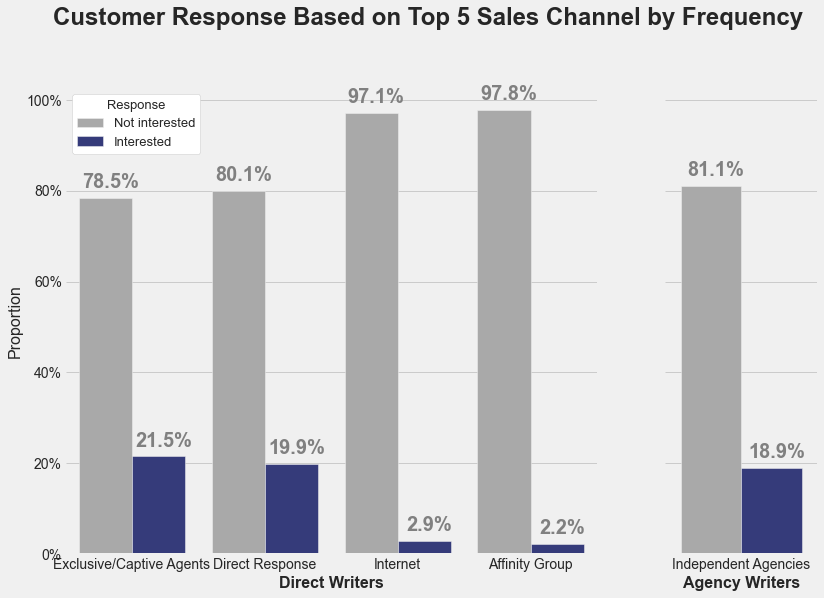

In [249]:
fig, ax = plt.subplots(
    nrows = 1, ncols = 2, figsize = (12, 8), sharey = True,
    gridspec_kw = {
        'width_ratios': [3.5, 1]
})

# plot direct writers
ax[0] = sns.barplot(
    x = 'Policy_Sales_Channel_Group',
    y = 'percentage',
    hue = 'Response',
    order = direct_writers.iloc[direct_writers[direct_writers['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Policy_Sales_Channel_Group'],
    palette = color_focus_policy_sales_channel_group,
    data = direct_writers,
    ax = ax[0]
)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)

L = ax[0].legend(fontsize = 13, frameon = True)
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
ax[0].set_yticks(y_)

ylabels = [format(y) + '%' for y in ax[0].get_yticks()]
ax[0].set_yticklabels(labels = ylabels, fontsize = 14)

ax[0].set_xlabel('Direct Writers', fontsize = 16, fontweight = 'semibold')
ax[0].set_ylabel('Proportion', fontsize = 16)

for p in ax[0].patches:
    ax[0].annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (5, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

# plot agency writers
ax[1] = sns.barplot(
    x = 'Policy_Sales_Channel_Group',
    y = 'percentage',
    hue = 'Response',
    order = agency_writers.iloc[agency_writers[agency_writers['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Policy_Sales_Channel_Group'],
    palette = color_focus_policy_sales_channel_group,
    data = agency_writers,
    ax = ax[1]
)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)

ax[1].legend([],[], frameon = False)

y_ = [x for x in range(0, 120, 20)]
ax[1].set_yticks(y_)

ylabels = [format(y) + '%' for y in ax[1].get_yticks()]
ax[1].set_yticklabels(labels = ylabels)

ax[1].set_xlabel('Agency Writers', fontsize = 16, fontweight = 'semibold')
ax[1].set_ylabel(' ', fontsize = 16)

for p in ax[1].patches:
    ax[1].annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (5, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.suptitle('Customer Response Based on Top 5 Sales Channel by Frequency', fontsize = 24, fontweight = 'semibold', ha = 'center', y = 1.02)

In [251]:
vintage_month_distribution = data_eda_viz.groupby(['Vintage_Month', 'Response']).count()[['id']]

vintage_month = data_eda_viz.groupby(['Vintage_Month']).count()[['id']]

vintage_month_distribution['percentage'] = vintage_month_distribution.div(vintage_month, level = 'Vintage_Month') * 100
vintage_month_distribution = vintage_month_distribution.reset_index()
vintage_month_distribution.columns = ['Vintage_Month', 'Response', '#of customers', 'percentage']
vintage_month_distribution


,Vintage_Month,Response,#of customers,percentage
0,0,0,6804,87.275526
1,0,1,992,12.724474
2,1,0,33564,87.588727
3,1,1,4756,12.411273
4,2,0,35756,87.759861
5,2,1,4987,12.240139
6,3,0,33657,88.038190
7,3,1,4573,11.961810
8,4,0,35934,87.682397
9,4,1,5048,12.317603


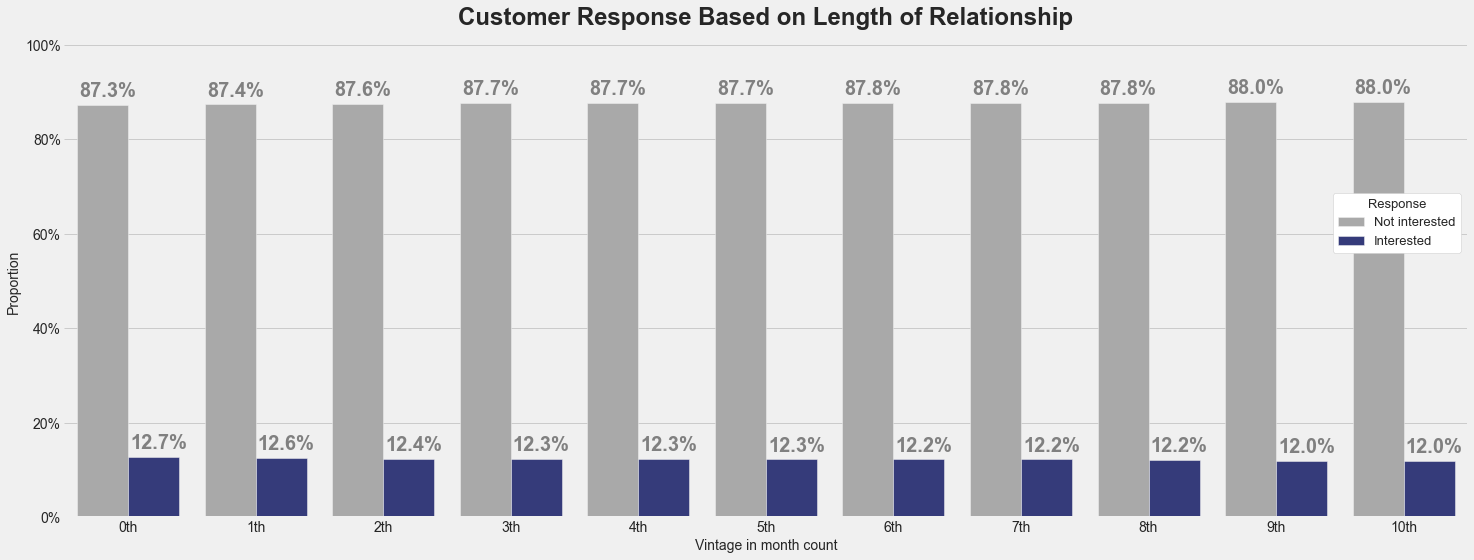

In [252]:

color_focus_vintage_month = ['#293286' if (x == 1) else 'darkgray' for x in vintage_month_distribution['Response']]
plt.figure(figsize = (20.7, 8))

# plot proportion
ax = sns.barplot(
    x = 'Vintage_Month',
    y = 'percentage',
    hue = 'Response',
    order = vintage_month_distribution.iloc[vintage_month_distribution[vintage_month_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Vintage_Month'],
    palette = color_focus_vintage_month,
    data = vintage_month_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True, bbox_to_anchor = (1, 0.7), loc = 'upper right')
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Vintage in month count', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

xlabels = [format(x) + 'th' for x in ax.get_xticks()]
ax.set_xticklabels(labels = xlabels)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (5, 8), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Length of Relationship', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

In [254]:
vintage_month_group_distribution = data_eda_viz.groupby(['Vintage_Month_Group', 'Response']).count()[['id']]

vintage_month_group = data_eda_viz.groupby(['Vintage_Month_Group']).count()[['id']]

vintage_month_group_distribution['percentage'] = vintage_month_group_distribution.div(vintage_month_group, level = 'Vintage_Month_Group') * 100
vintage_month_group_distribution = vintage_month_group_distribution.reset_index()
vintage_month_group_distribution.columns = ['Vintage_Month_Group', 'Response', '#of customers', 'percentage']
vintage_month_group_distribution

,Vintage_Month_Group,Response,#of customers,percentage
0,4-7 Month,0,138125,87.653890
1,4-7 Month,1,19455,12.346110
2,< 4 Month,0,109781,87.762313
3,< 4 Month,1,15308,12.237687
4,> 7 Month,0,86493,87.863673
5,> 7 Month,1,11947,12.136327


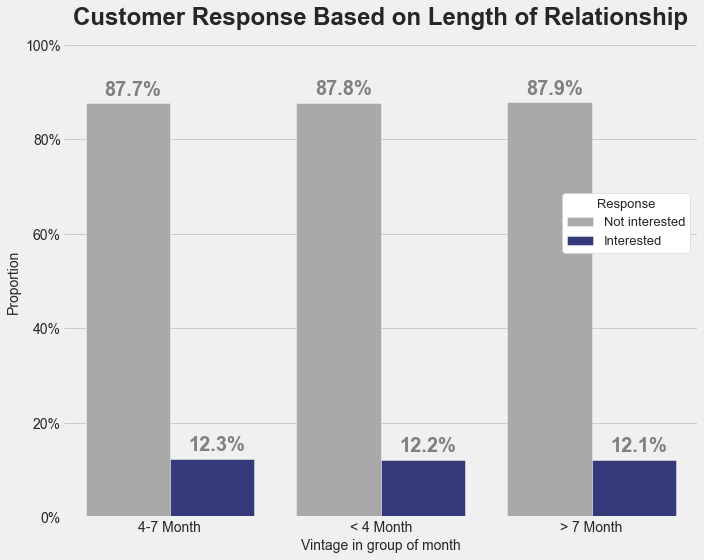

In [255]:

color_focus_vintage_month_group = ['#293286' if (x == 1) else 'darkgray' for x in vintage_month_group_distribution['Response']]
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'Vintage_Month_Group',
    y = 'percentage',
    hue = 'Response',
    order = vintage_month_group_distribution.iloc[vintage_month_group_distribution[vintage_month_group_distribution['Response'] == 1]['percentage'].sort_values(ascending = False).index]['Vintage_Month_Group'],
    palette = color_focus_vintage_month_group,
    data = vintage_month_group_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True, bbox_to_anchor = (1, 0.7), loc = 'upper right')
L.get_texts()[0].set_text('Not interested')
L.get_texts()[1].set_text('Interested')
L.set_title('Response', prop = {'size' : 13})
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Vintage in group of month', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 20,
        xytext = (5, 8), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Customer Response Based on Length of Relationship', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()